In [1]:
#Импорт библиотек и модулей
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import data_preprocessing as dp
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Загрузка датасета
data = pd.read_csv('weatherAUS.csv')
data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [3]:
#Удаление ненужных данных
data = data.drop(columns=['Date', 'Cloud9am', 'Cloud3pm', 'Sunshine', 'Evaporation'])

In [4]:
#Проверка на пропущенные значения
dp.missing_values_report(data)

Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
dtype: int64

In [5]:
#Удаление строк с пропущенными значениями
data = data.dropna()

In [6]:
#Значения колонок датасета
data.describe().T

count         mean        std    min     25%     50%  \
MinTemp        112925.0    12.664721   6.254135   -8.2     8.1    12.4   
MaxTemp        112925.0    23.655670   6.982702    2.6    18.3    23.1   
Rainfall       112925.0     2.377892   8.602968    0.0     0.0     0.0   
WindGustSpeed  112925.0    40.786611  13.321774    7.0    31.0    39.0   
WindSpeed9am   112925.0    15.179163   8.344304    2.0     9.0    13.0   
WindSpeed3pm   112925.0    19.500545   8.580097    2.0    13.0    19.0   
Humidity9am    112925.0    67.404162  18.911610    0.0    56.0    68.0   
Humidity3pm    112925.0    50.669055  20.768550    0.0    36.0    51.0   
Pressure9am    112925.0  1017.425847   7.032654  980.5  1012.8  1017.4   
Pressure3pm    112925.0  1015.048962   6.957822  977.1  1010.3  1015.0   
Temp9am        112925.0    17.462008   6.355045   -3.1    12.7    17.1   
Temp3pm        112925.0    22.127306   6.837380    1.7    16.9    21.6   

                  75%     max  
MinTemp          17.2    33.9  
MaxTemp          28.7    48.1  
Rainfall          0.8   367.6  
WindGustSpeed    48.0   135.0  
WindSpeed9am     20.0    87.0  
WindSpeed3pm     24.0    87.0  
Humidity9am      81.0   100.0  
Humidity3pm      65.0   100.0  
Pressure9am    1022.1  1041.0  
Pressure3pm    1019.7  1039.6  
Temp9am          22.0    40.2  
Temp3pm          26.9    46.7

In [7]:
#Кол-во значений в класссах целевой переменной
data.RainTomorrow.value_counts()

RainTomorrow
No     87906
Yes    25019
Name: count, dtype: int64

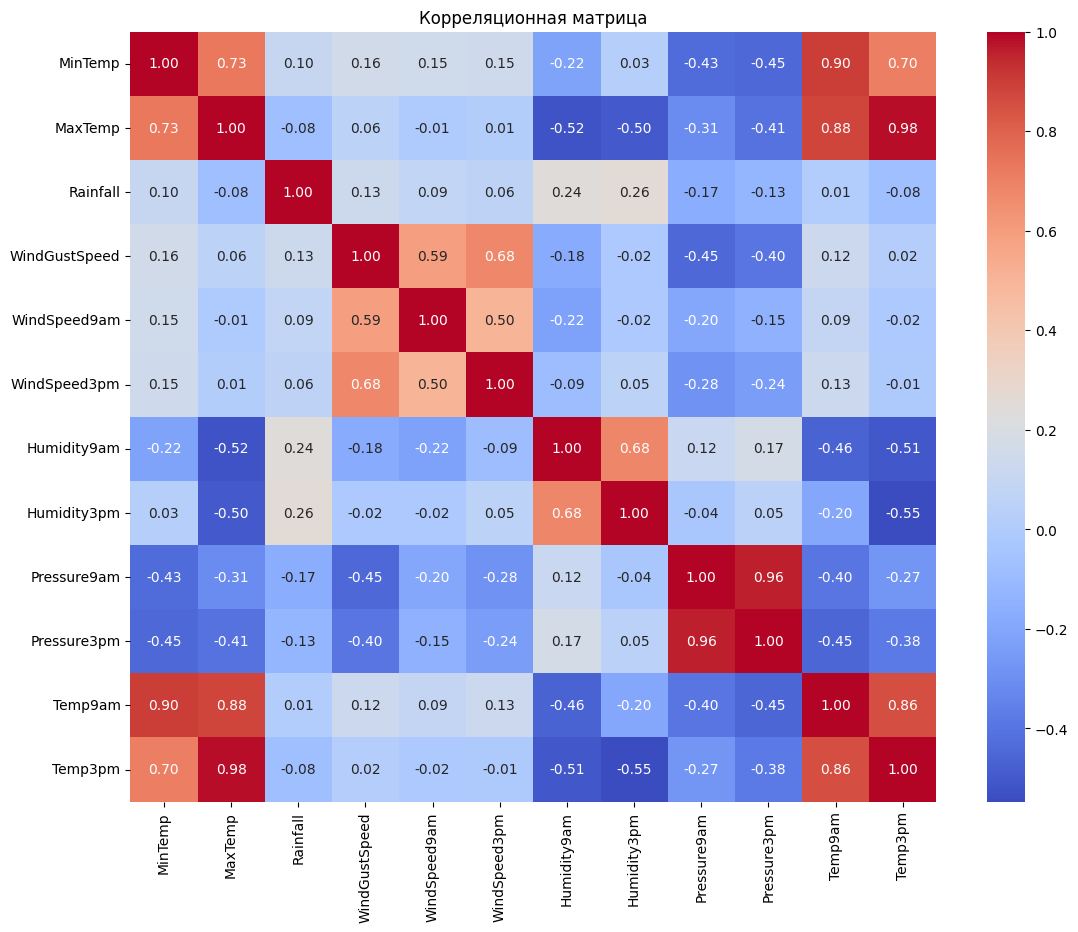

In [8]:
#Корреляционная матрица
plt.figure(figsize=(13, 10))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

In [9]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Location - местоположение метеостанции
MinTemp - минимальная температура
MaxTemp - максимальная температура
Rainfall - кол-во осадков
WindGustDir - направление самого сильного порыва ветра за 24 часа до полуночи
WindGustSpeed - скорость (км/ч) самого сильного порыва ветра за 24 часа до полуночи
WindDir9am - направление ветра в 9 утра
WindDir3pm - направление ветра в 15:00
Humidity9am - влажность (в процентах) в 9 утра
Humidity3pm - влажность (в процентах) в 15:00
Pressure9am - атмосферное давление (гПа) приведено к среднему уровню моря в 9 утра
Pressure3pm - атмосферное давление (гПа) приведено к среднему уровню моря в 15:00
Temp9am - температура (градусы Цельсия) в 9 утра
Temp3pm - температура (градусы Цельсия) в 15:00
RainToday - был ли сегодня дождь

In [10]:
#Указание числовых и категориальных признаков
target_column = 'RainTomorrow'
numeric_features = ['MinTemp', 'MaxTemp', 'Rainfall',
                    'WindGustSpeed', 'WindSpeed9am',
                    'WindSpeed3pm', 'Humidity9am', 
                    'Humidity3pm', 'Pressure9am',
                    'Pressure3pm', 'Temp9am', 'Temp3pm']
categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

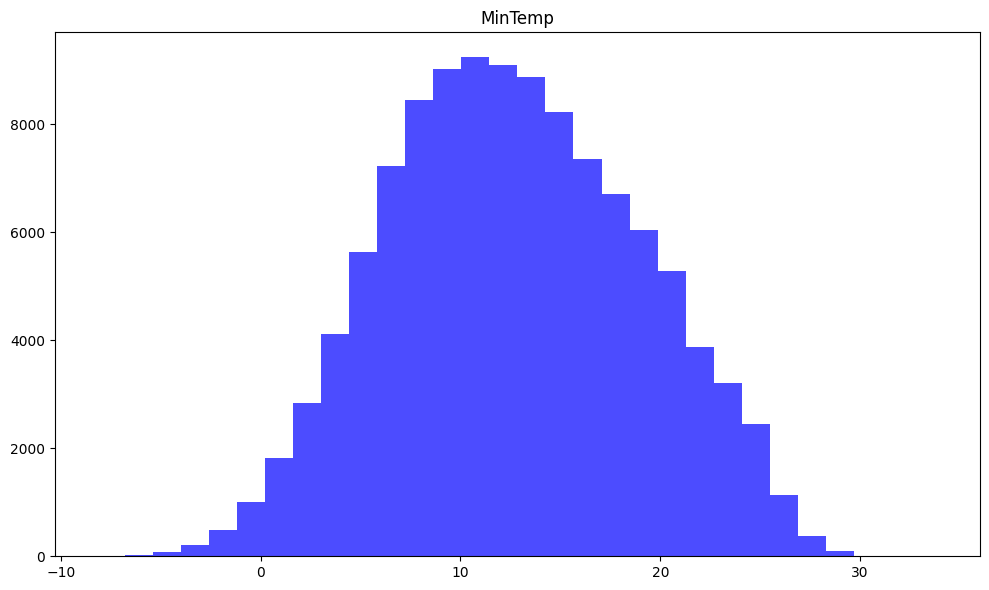

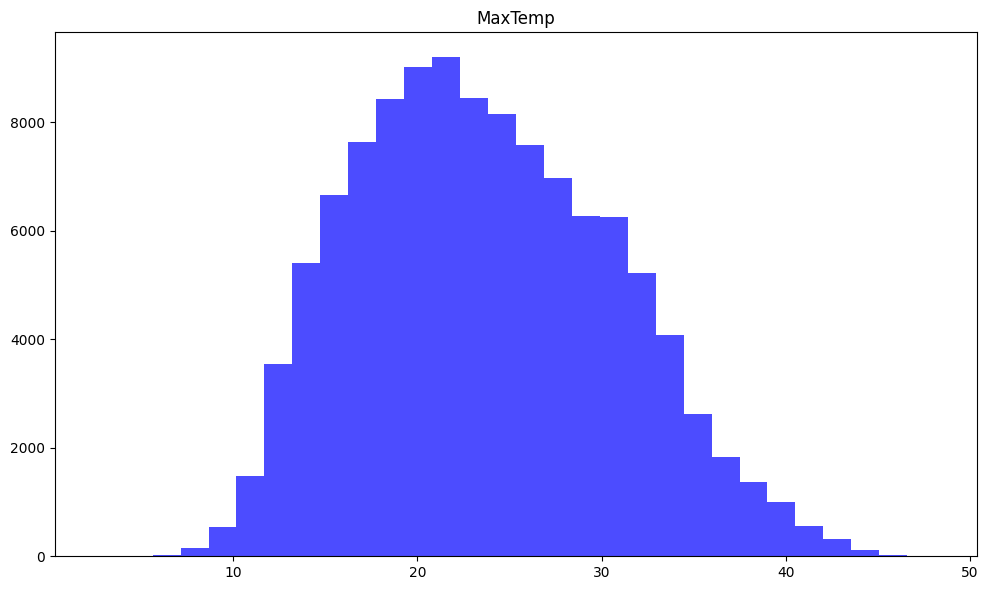

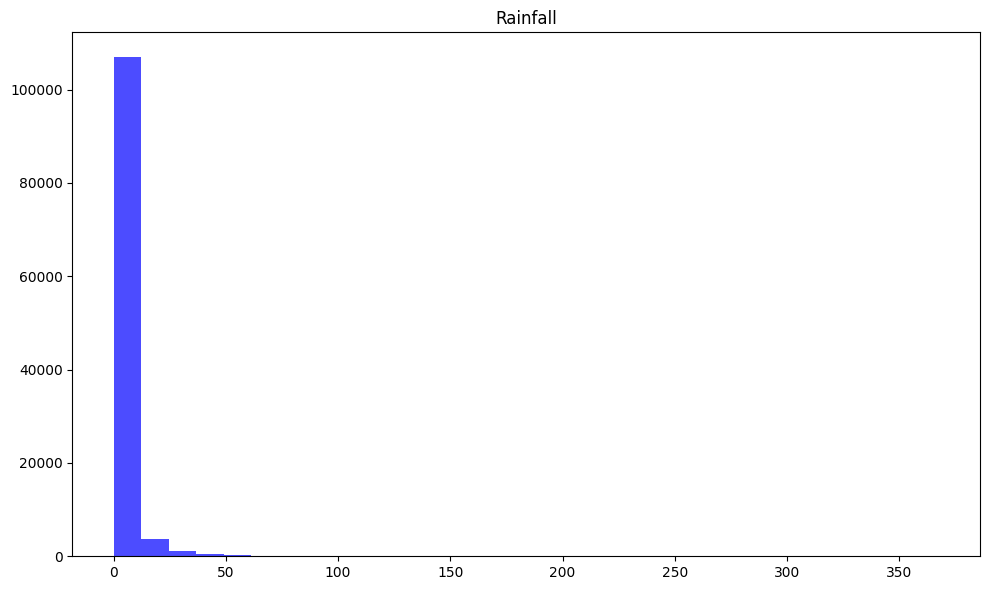

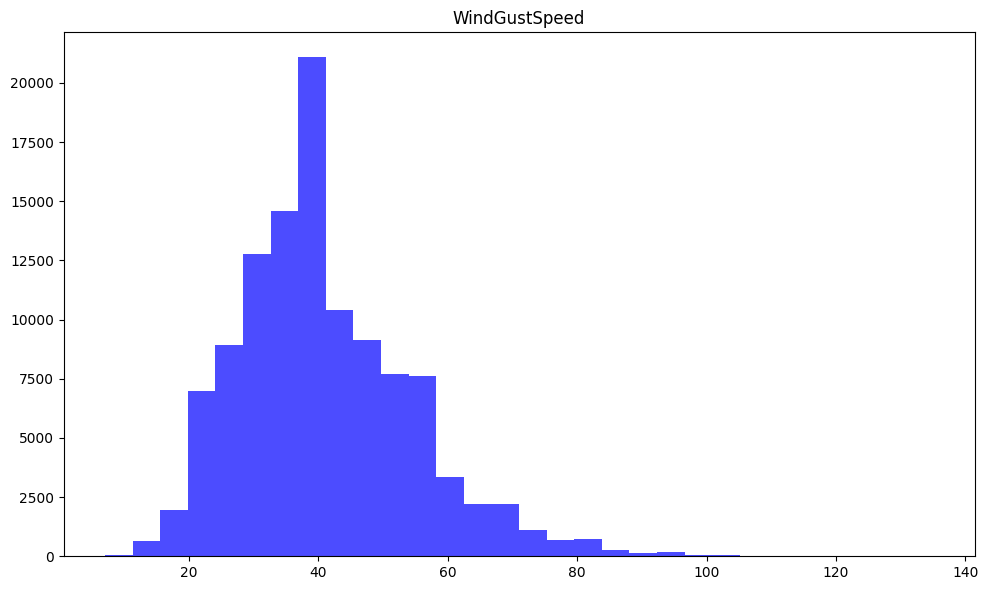

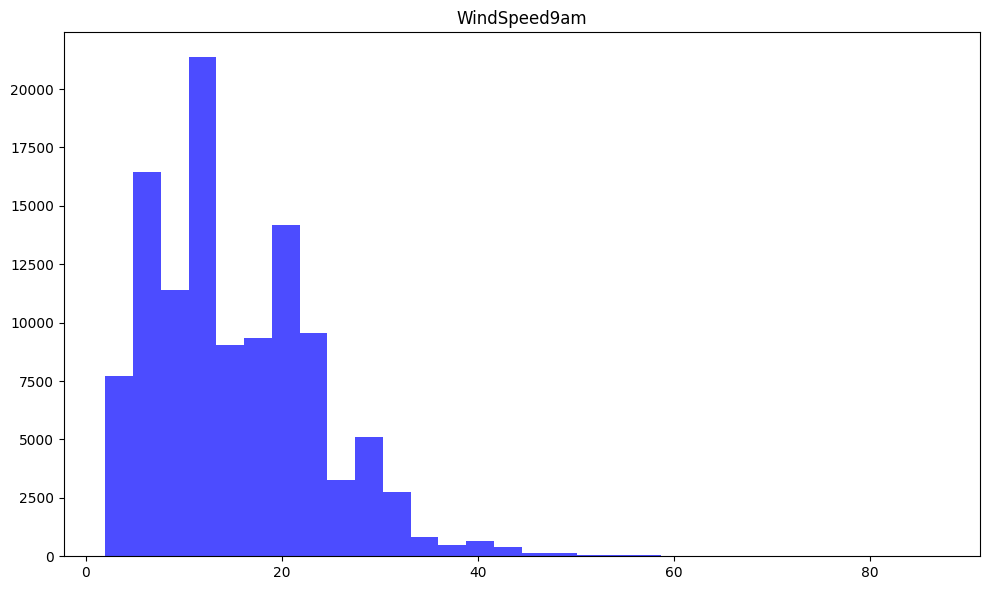

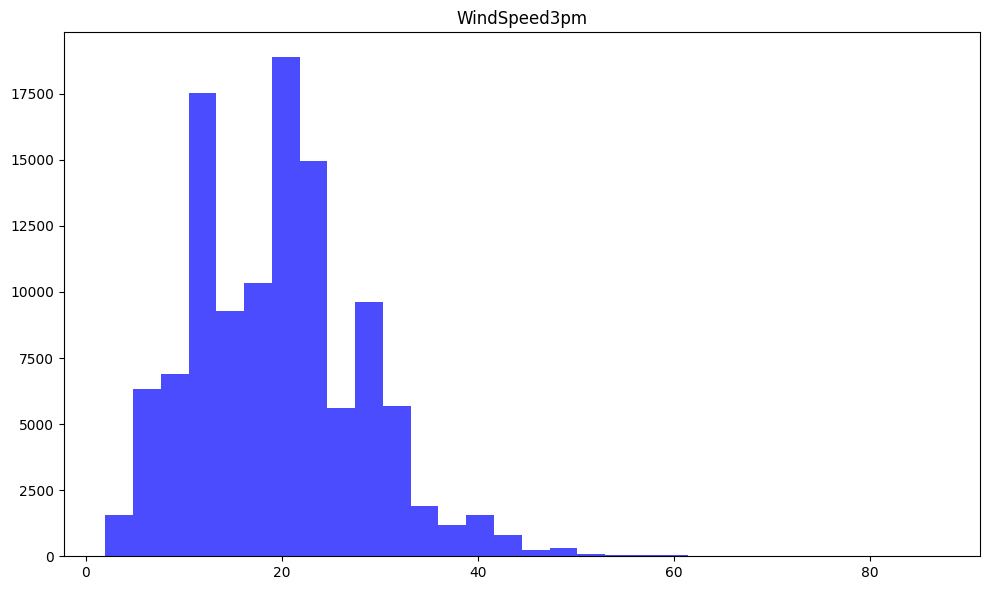

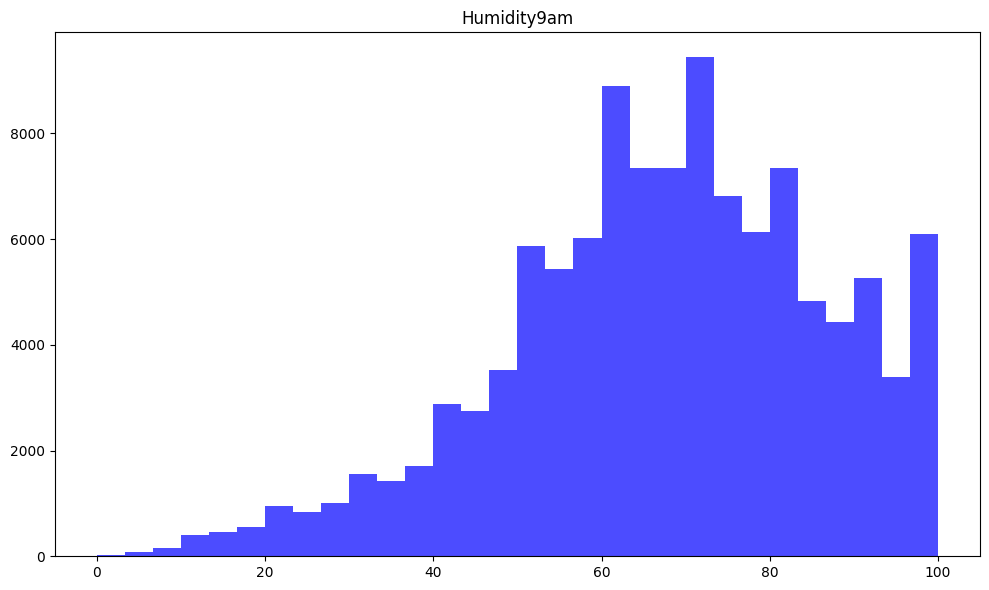

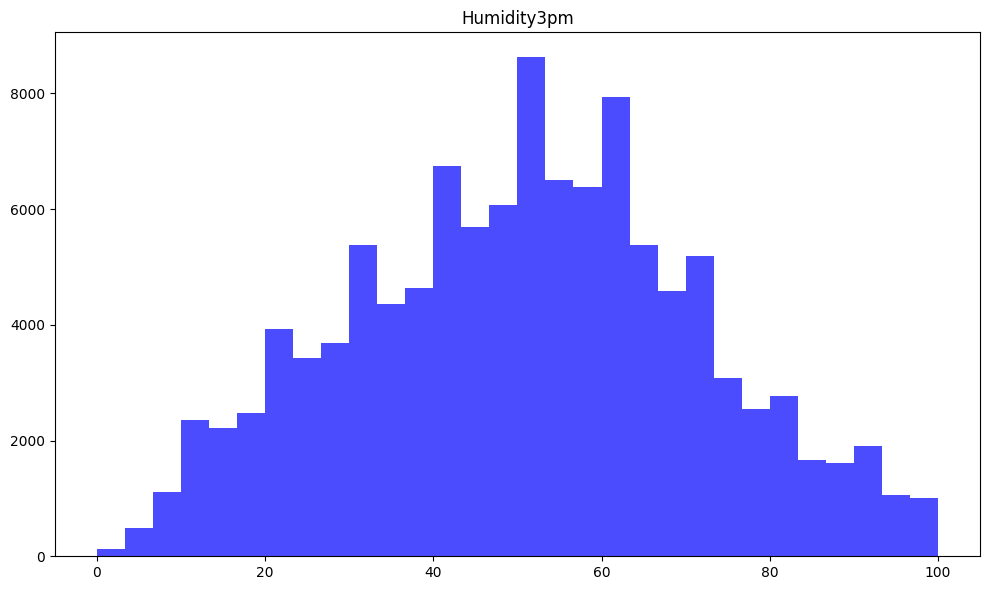

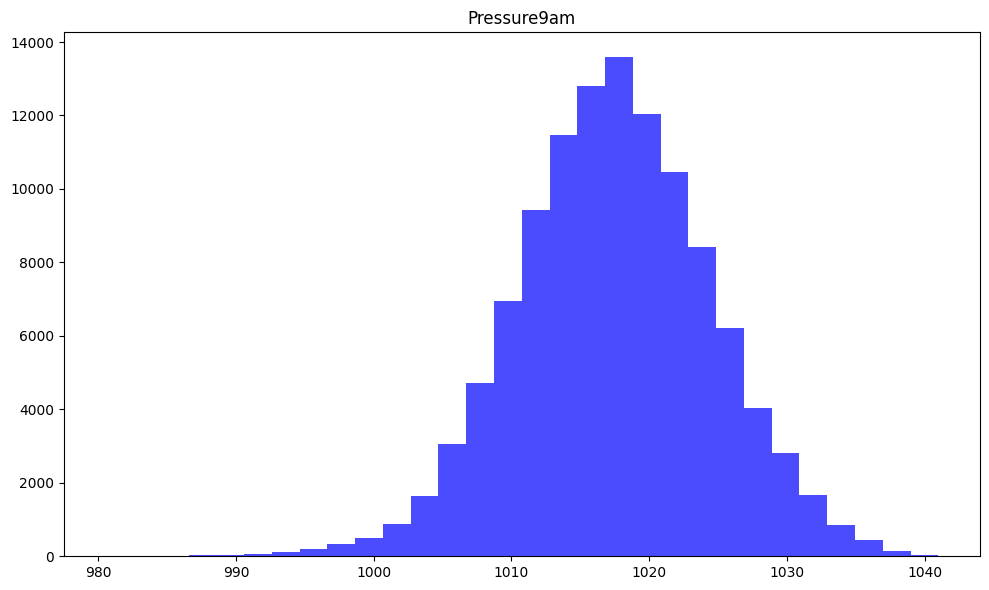

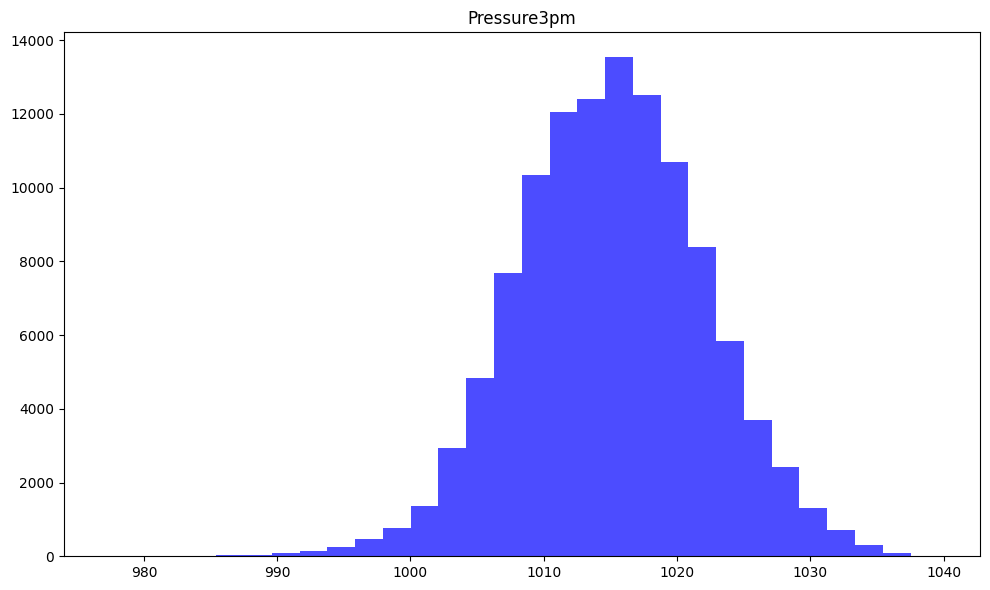

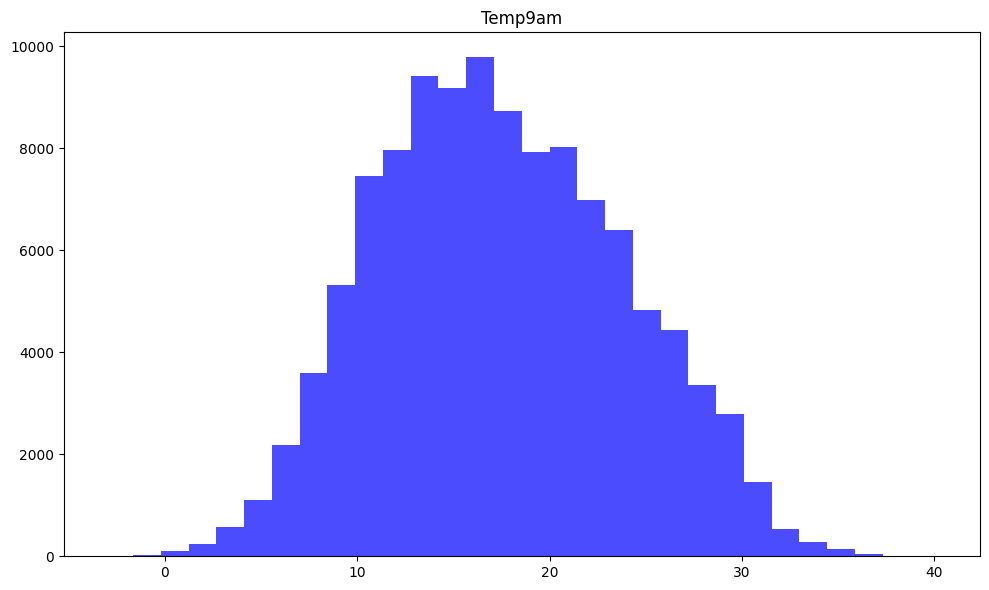

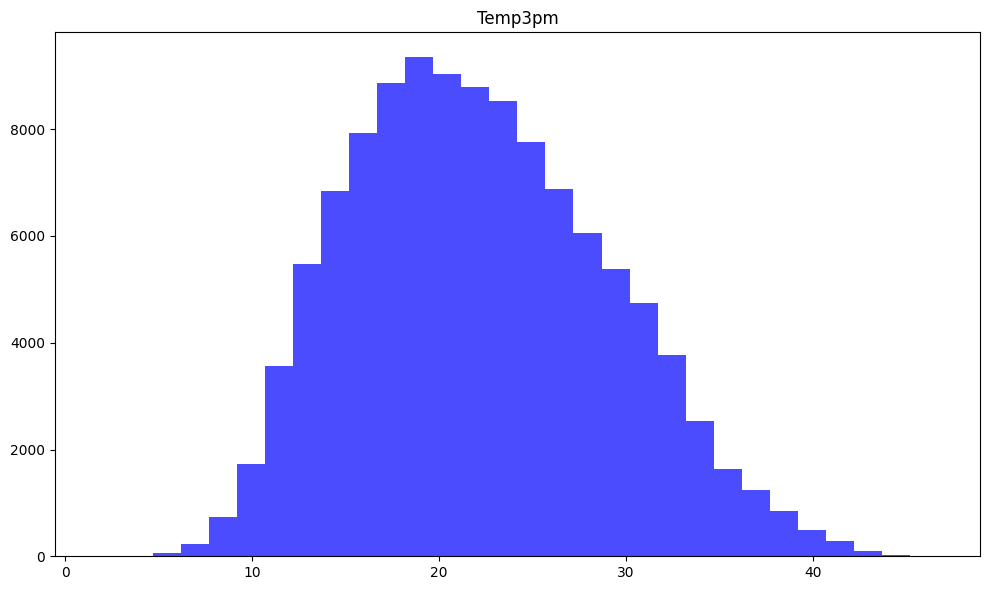

In [11]:
#Гистограммы для числовых значений
def histogram(data, hist_name):
    fig, ax = plt.subplots(1, figsize=(10, 6))

    ax.hist(data, bins=30, alpha=0.7, color='blue')
    ax.set_title(f'{hist_name}')

    plt.tight_layout()
    plt.show()

for column in numeric_features:
  histogram(data[column], column)

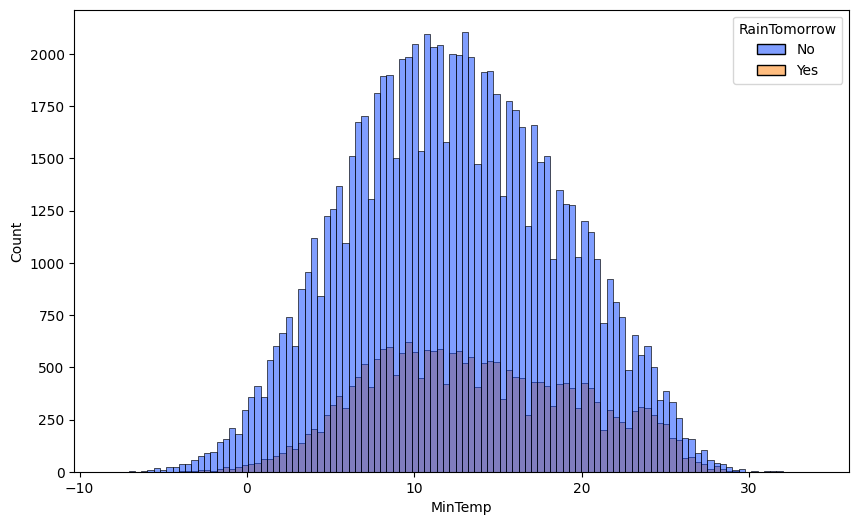

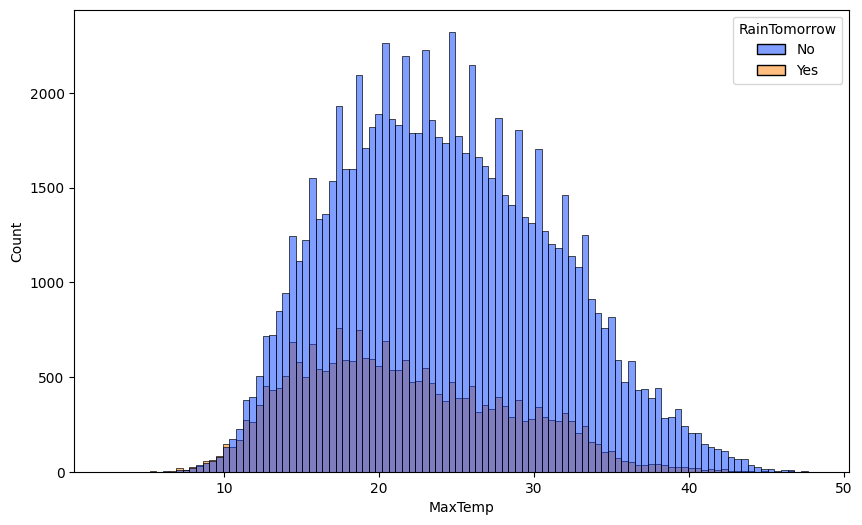

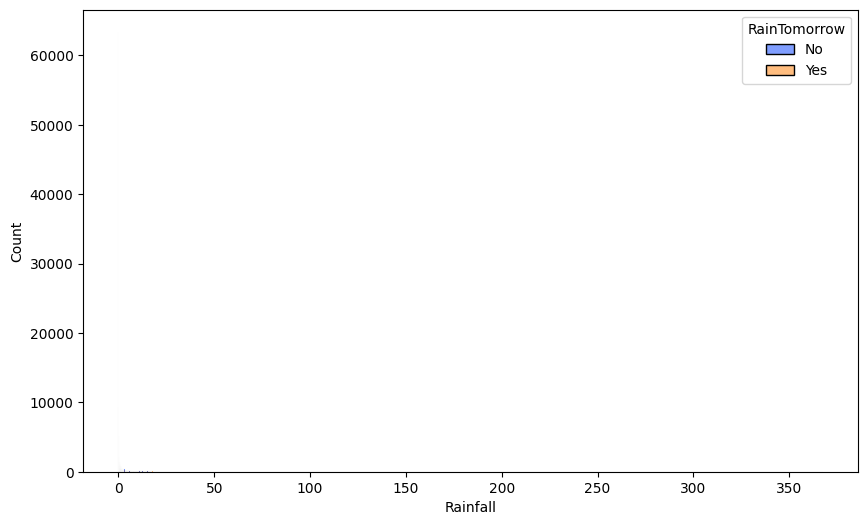

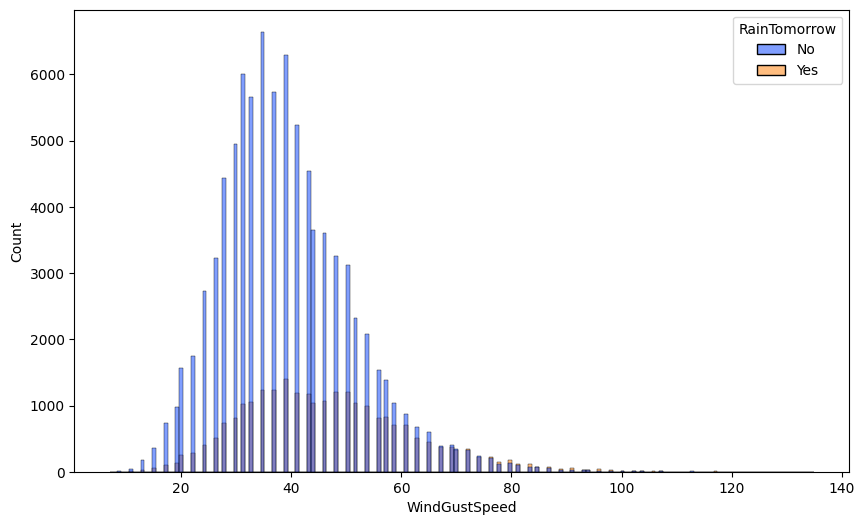

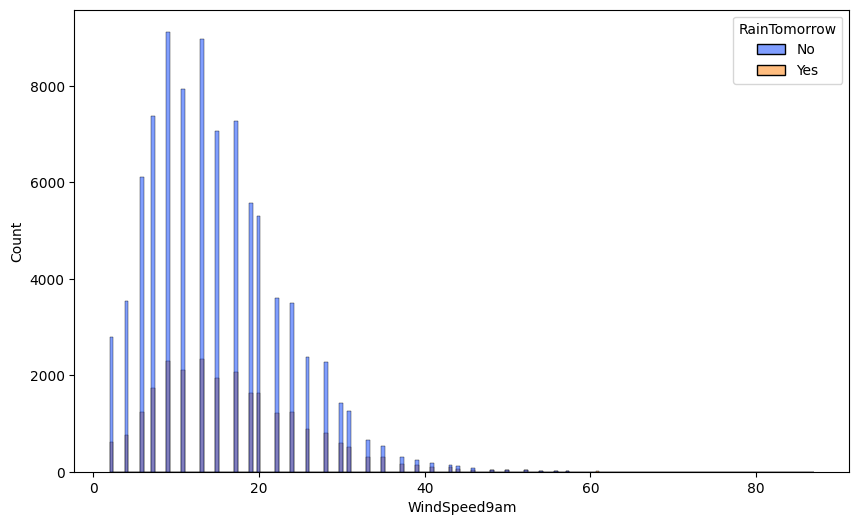

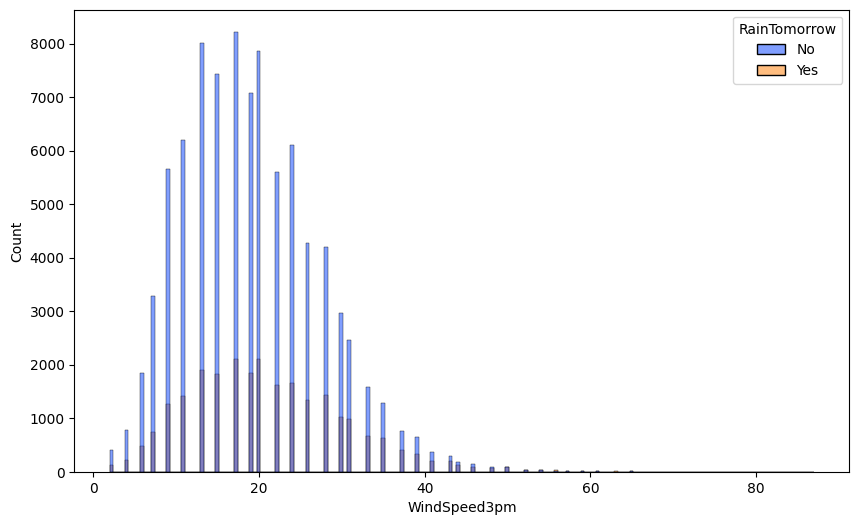

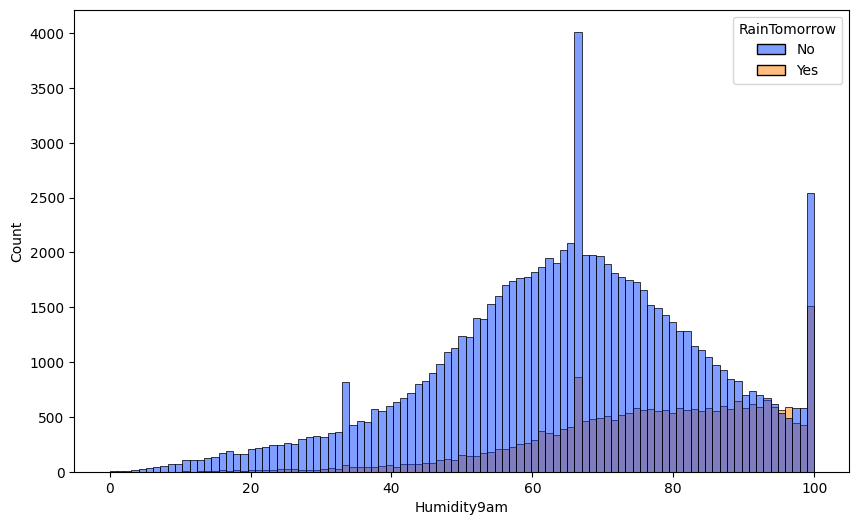

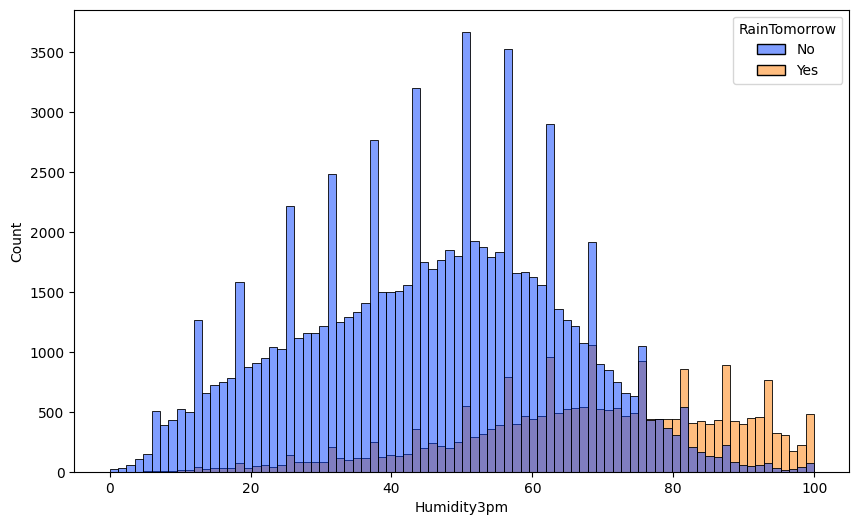

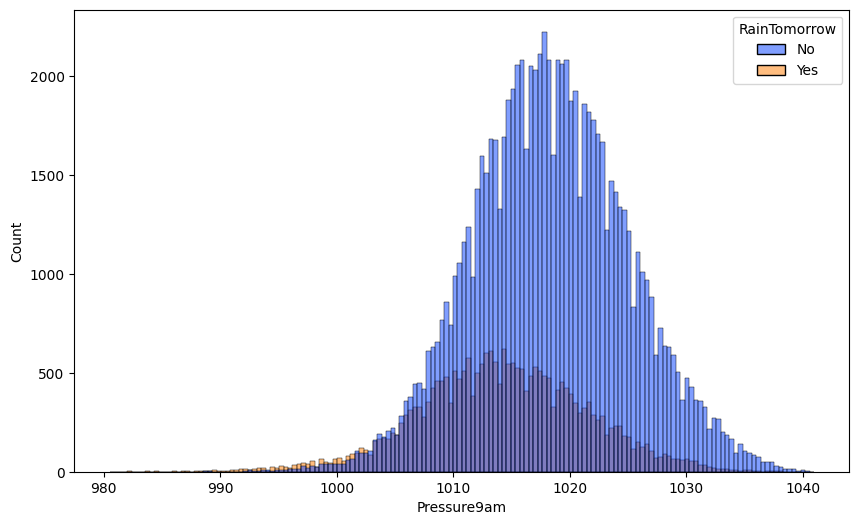

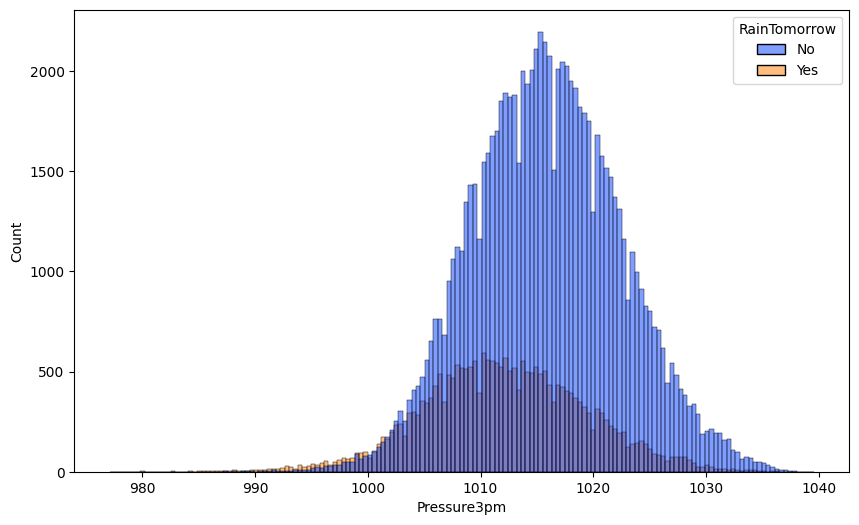

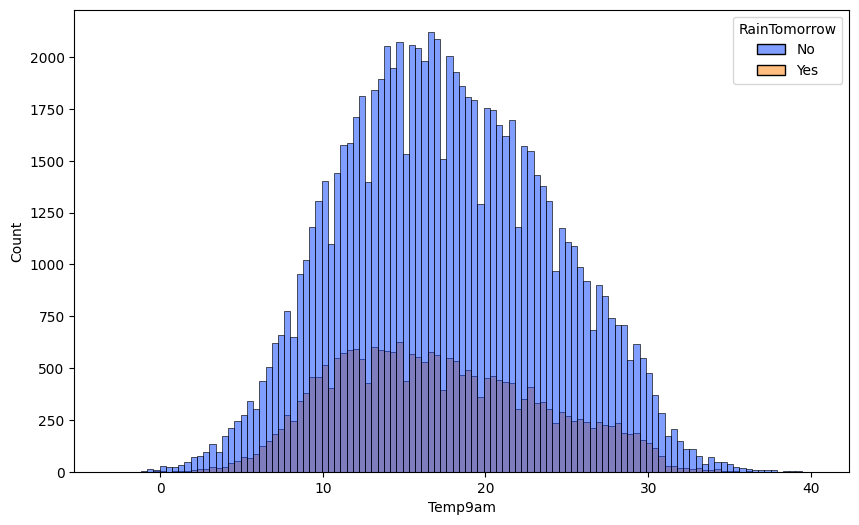

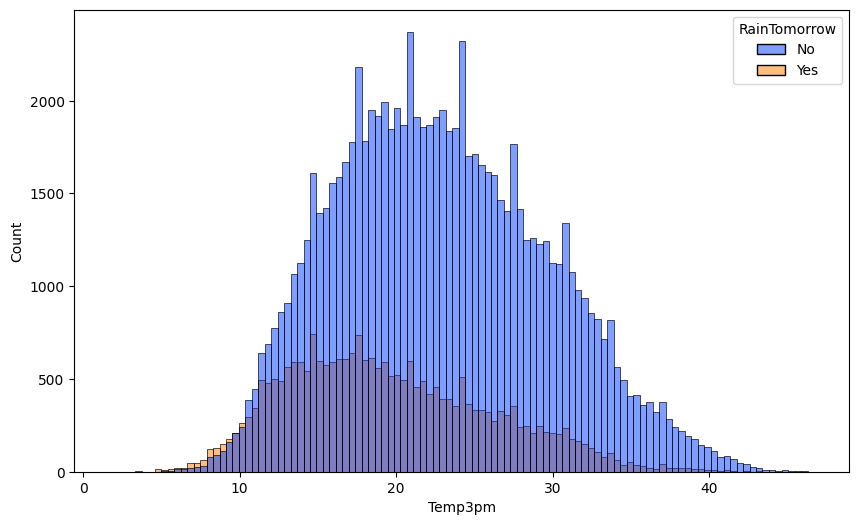

In [12]:
#Сравнение распределения данных по классам
for column in numeric_features:
    plt.figure(figsize=(10,6))
    sns.histplot(data=data, x = data[column], hue=data['RainTomorrow'], palette='bright')

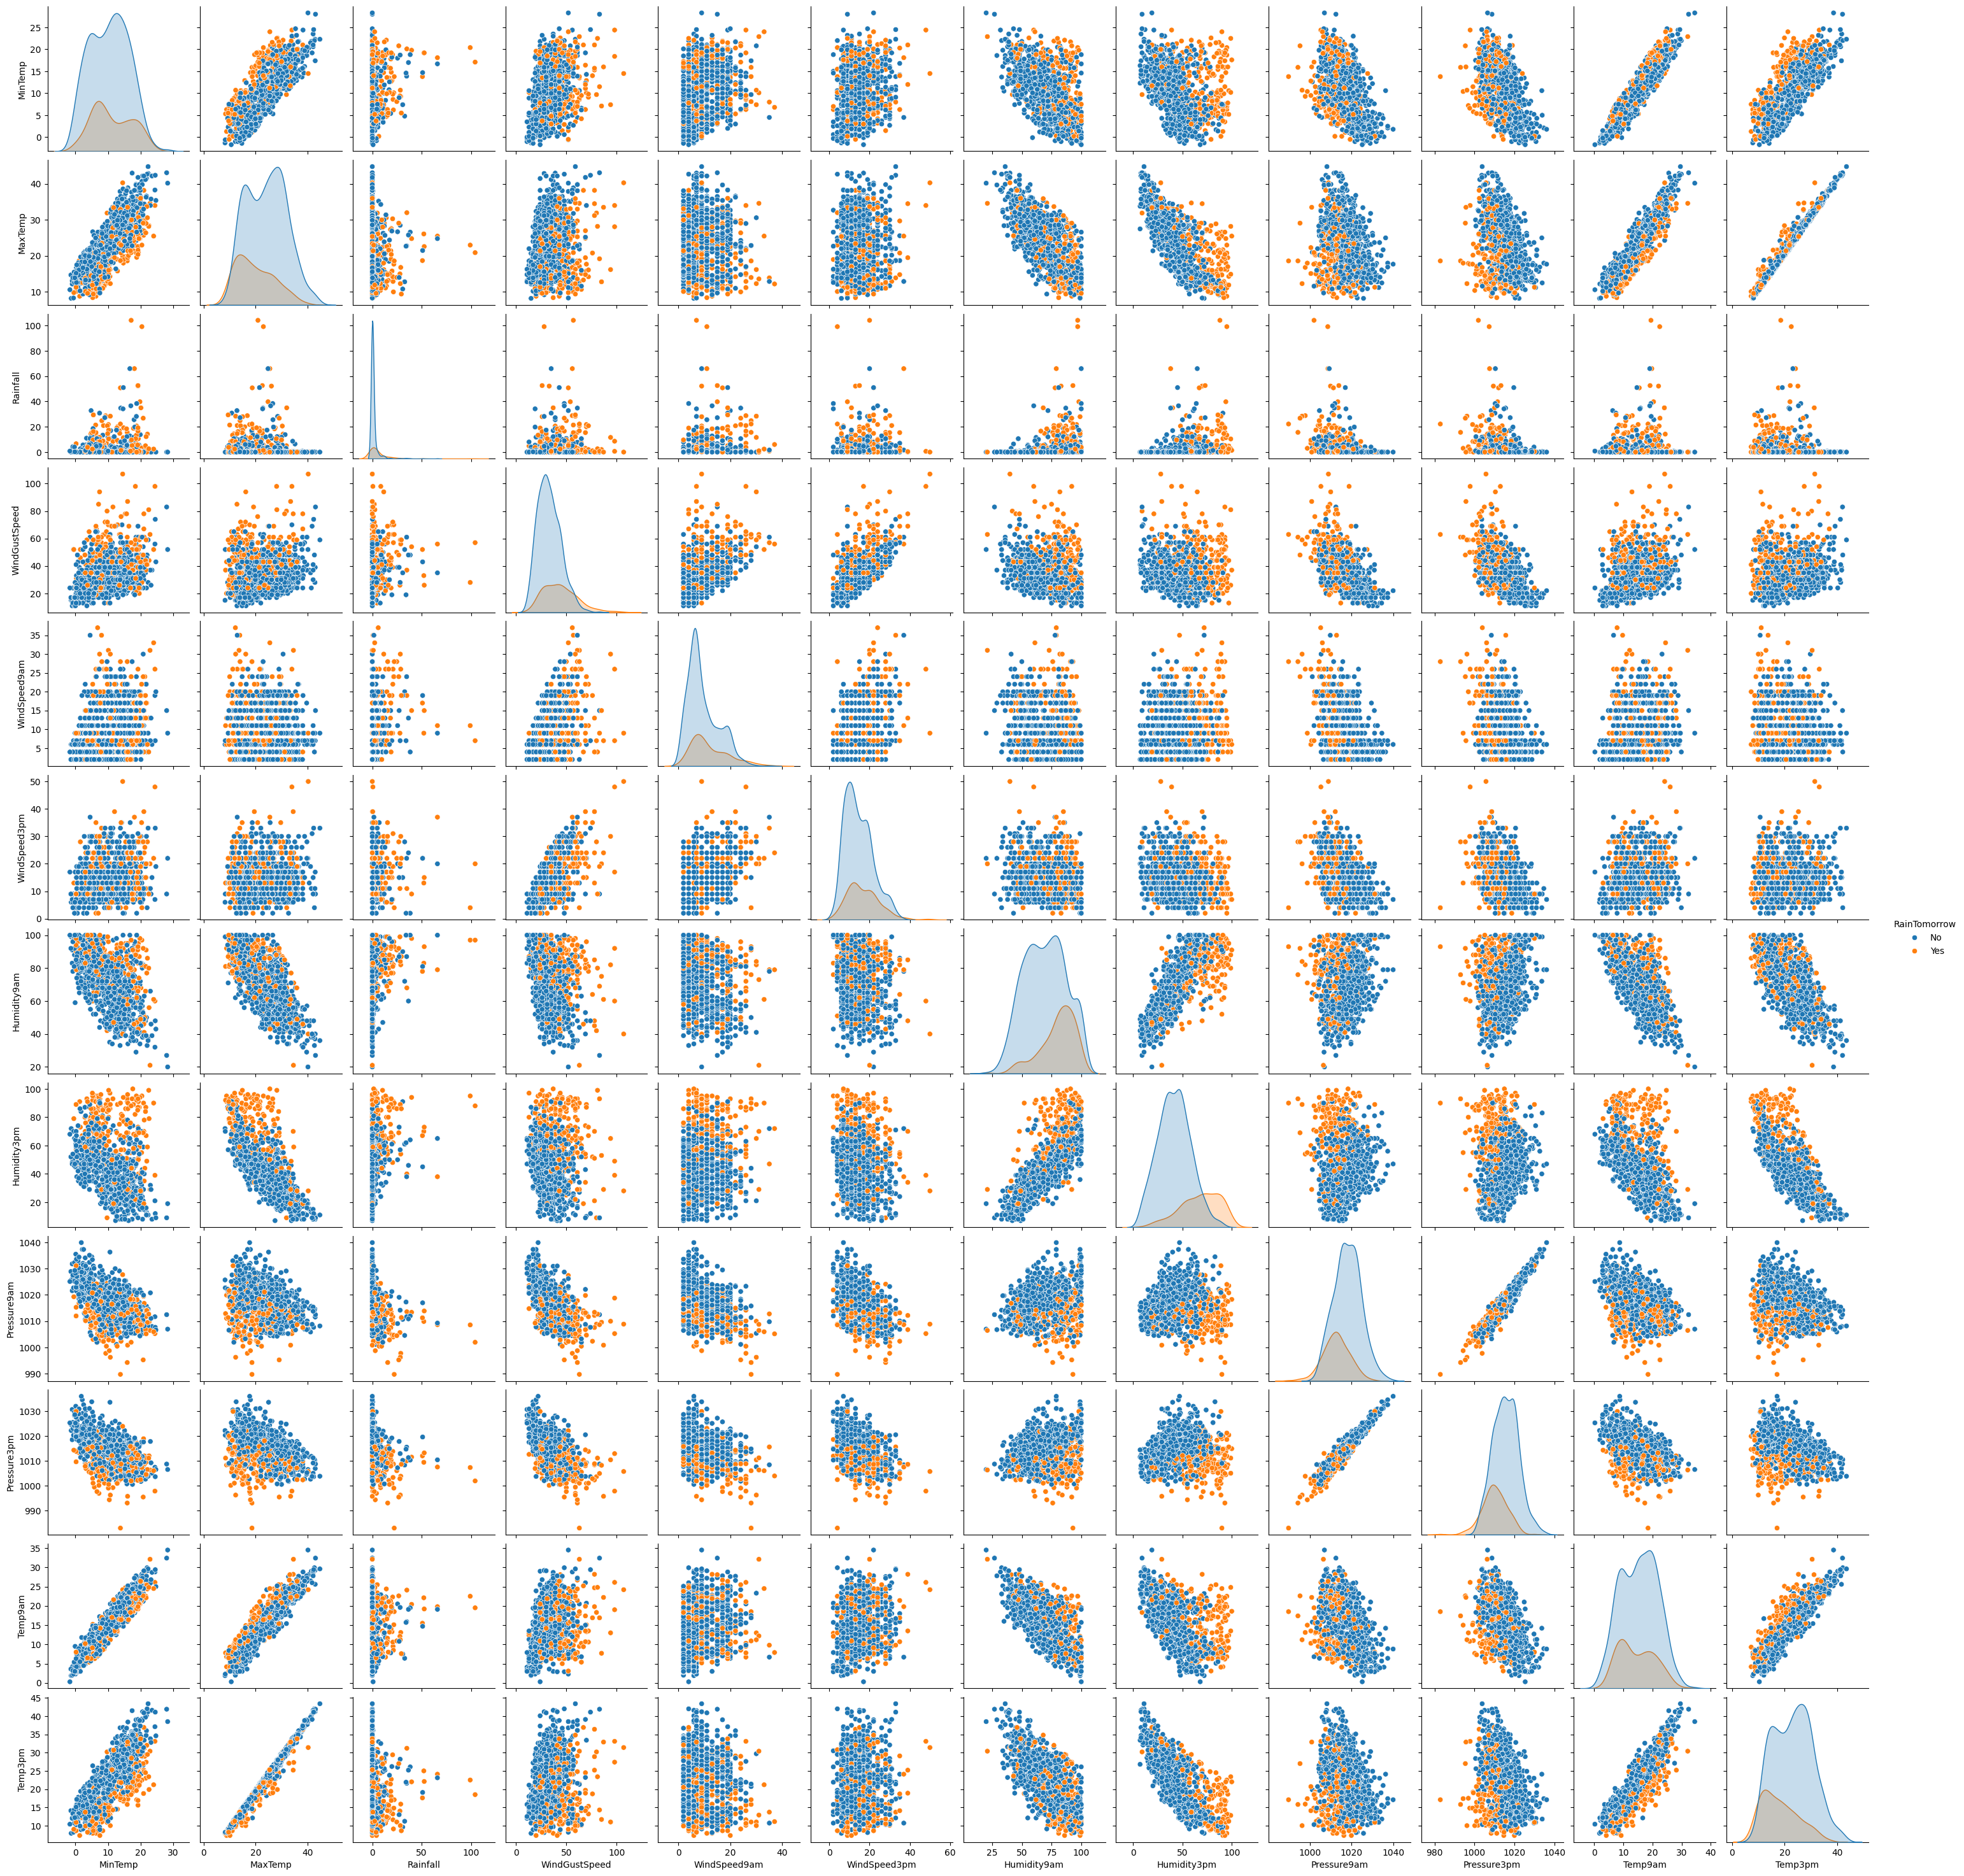

In [13]:
#Визуализация данных
sns.pairplot(data[:1000], hue='RainTomorrow')
plt.show()

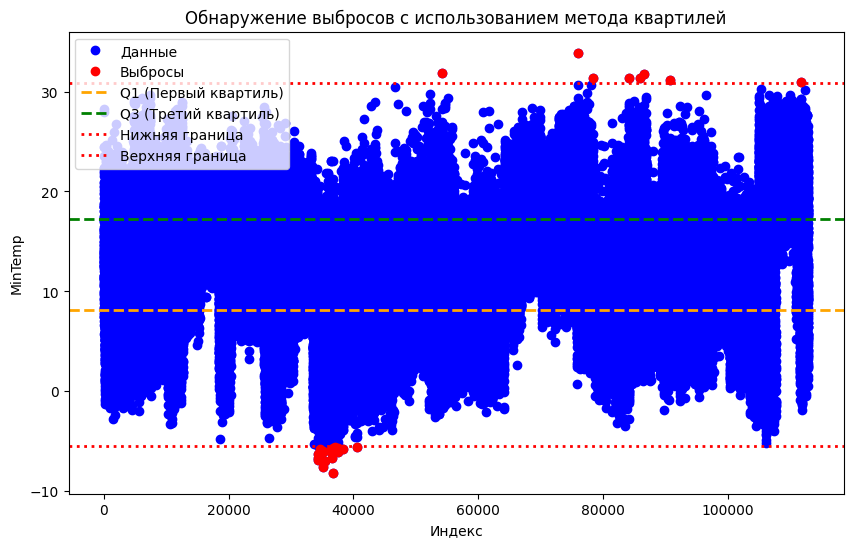

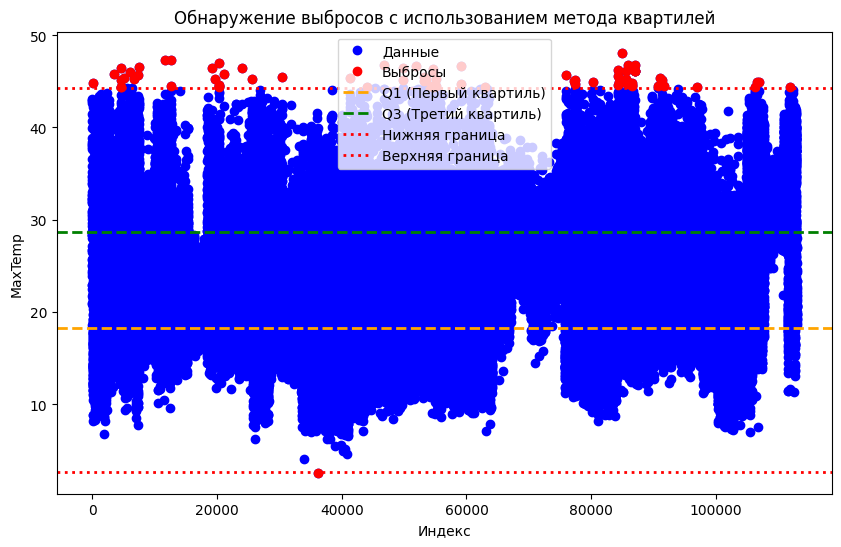

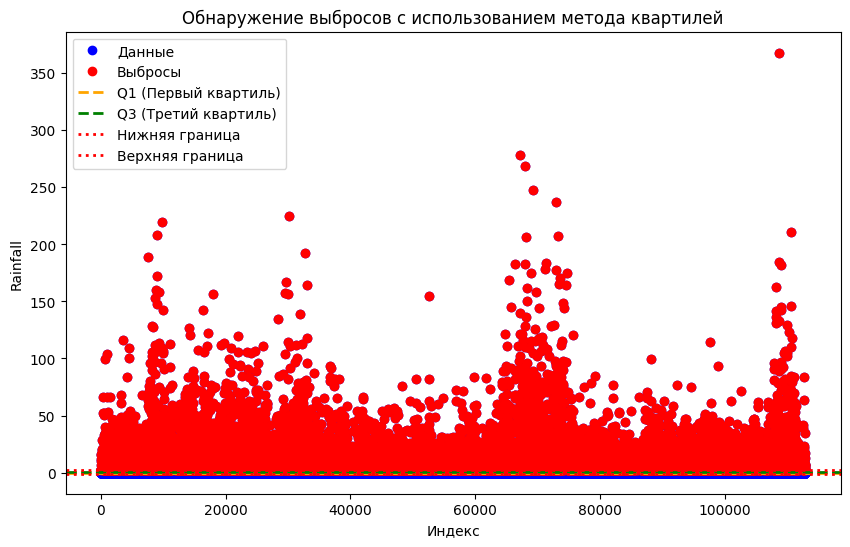

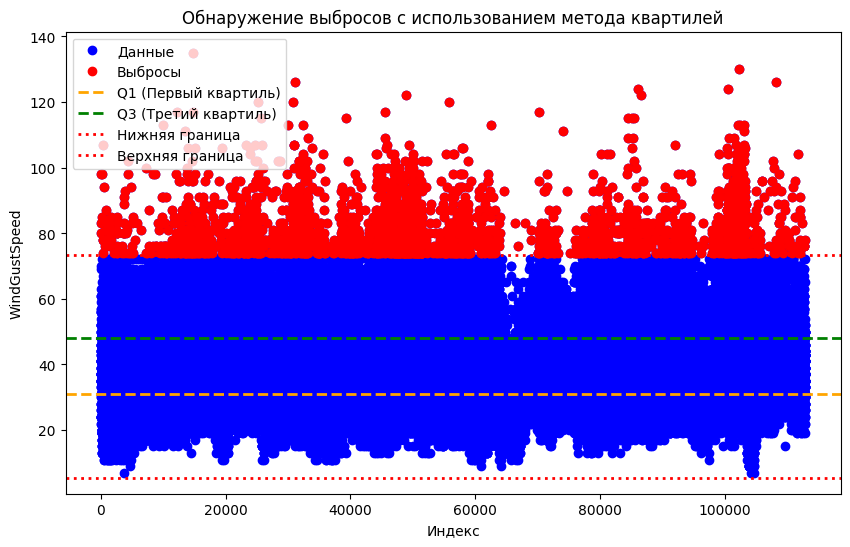

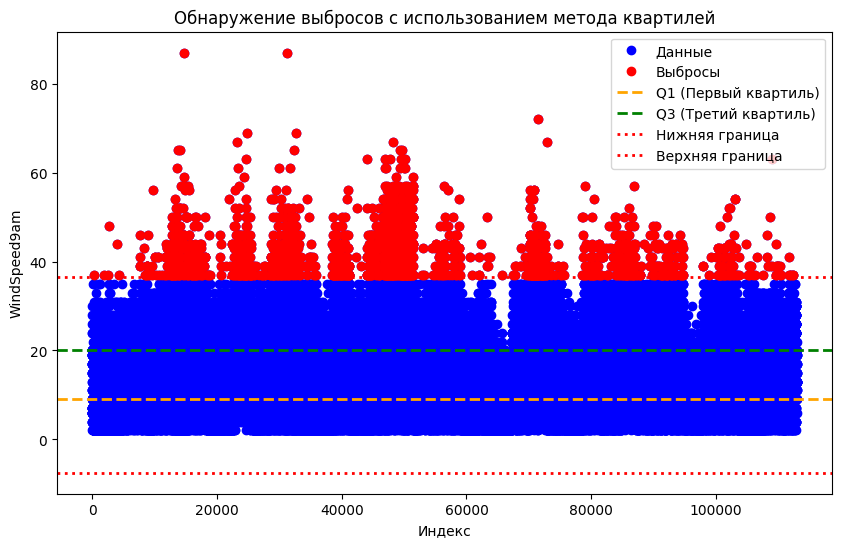

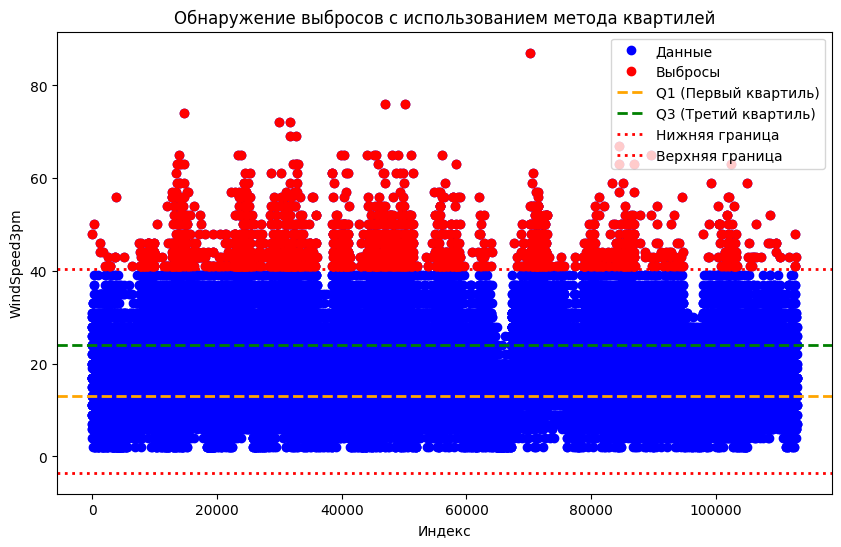

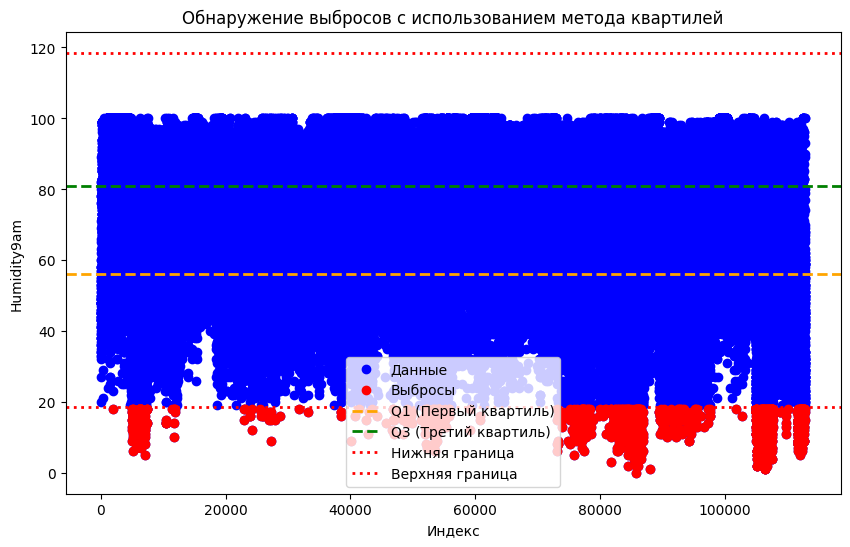

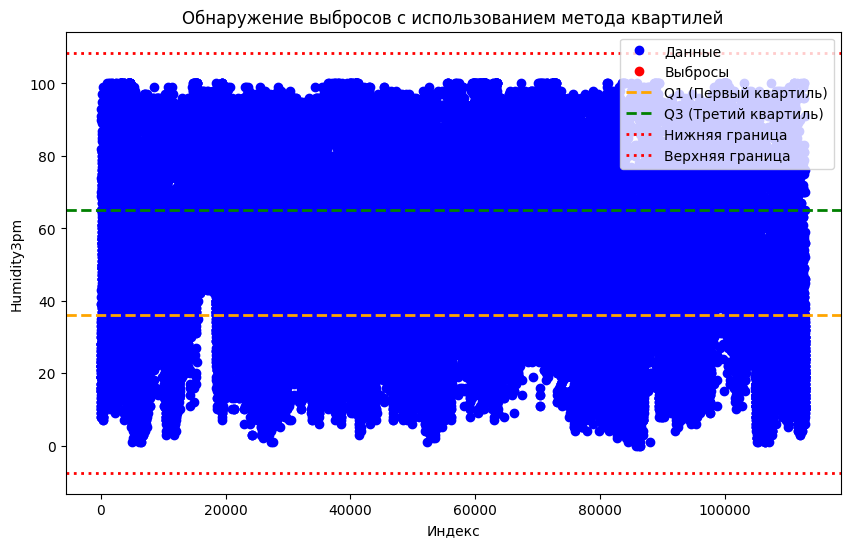

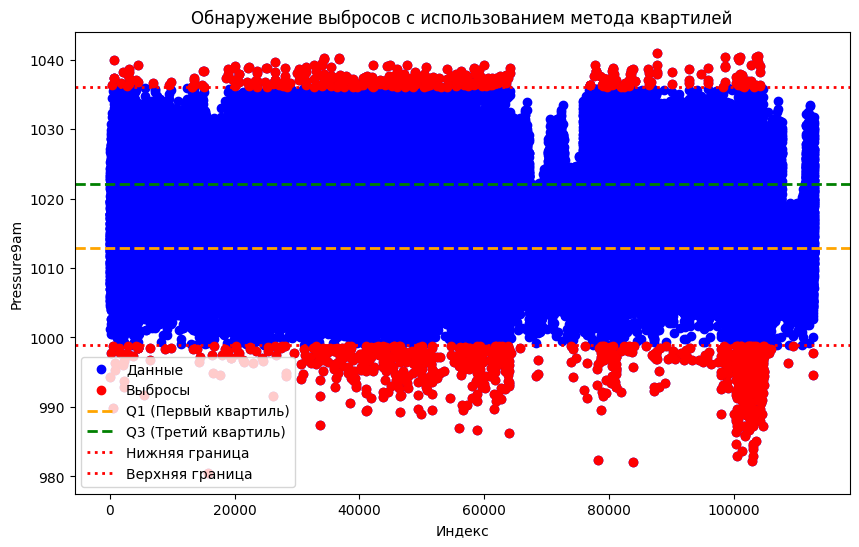

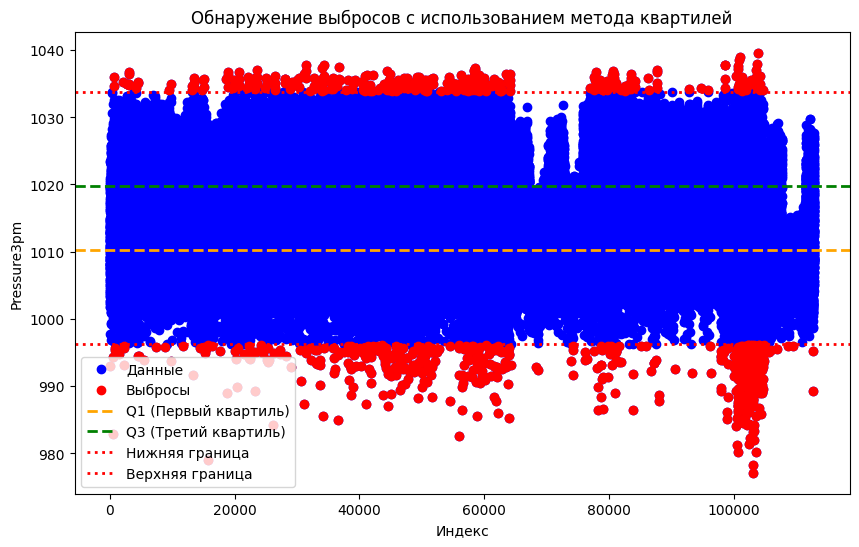

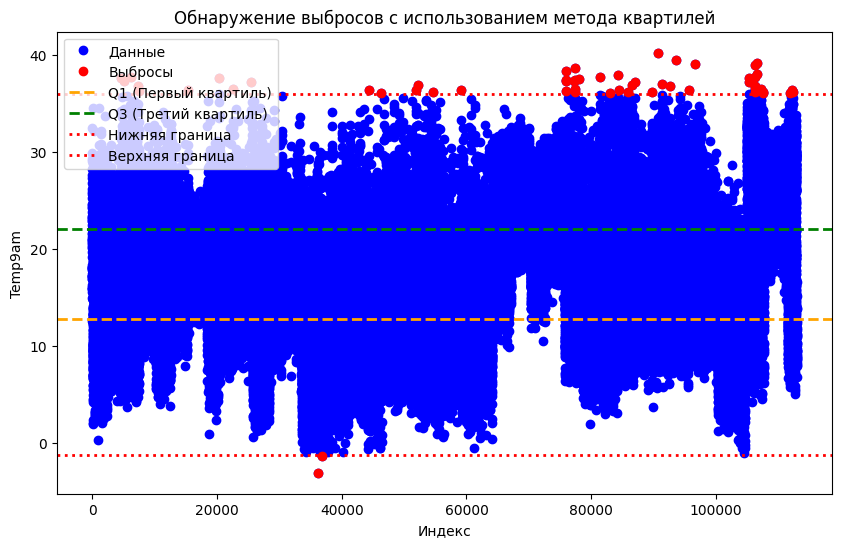

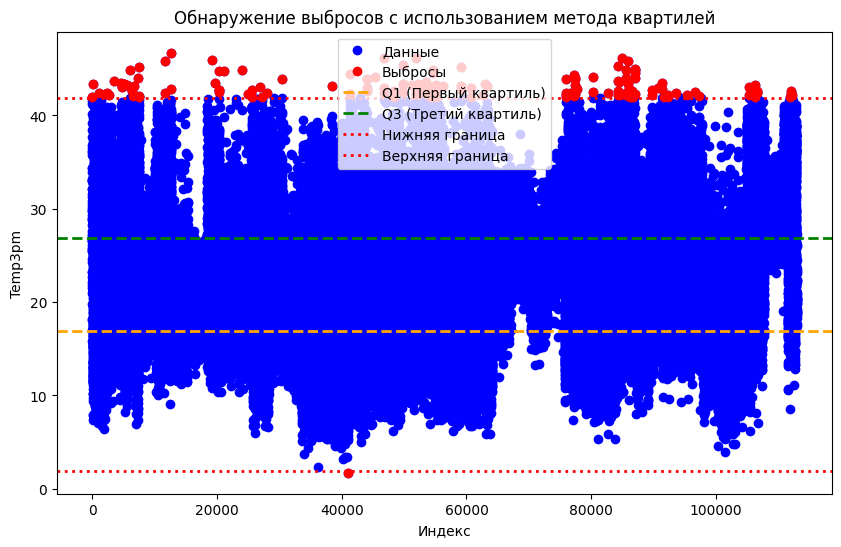

In [14]:
#Аномалии
def anomaly_detection(data, column_name):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = np.where((data < lower_bound) | (data > upper_bound))
    
    plt.figure(figsize=(10, 6))
    plt.plot(data, 'bo', label='Данные')
    plt.plot(outliers[0], data[outliers], 'ro', label='Выбросы')
    plt.axhline(Q1, color='orange', linestyle='dashed', linewidth=2, label='Q1 (Первый квартиль)')
    plt.axhline(Q3, color='green', linestyle='dashed', linewidth=2, label='Q3 (Третий квартиль)')
    plt.axhline(lower_bound, color='red', linestyle='dotted', linewidth=2, label='Нижняя граница')
    plt.axhline(upper_bound, color='red', linestyle='dotted', linewidth=2, label='Верхняя граница')
    
    plt.title('Обнаружение выбросов с использованием метода квартилей')
    plt.xlabel('Индекс')
    plt.ylabel(column_name)
    plt.legend()
    plt.show()

for column in numeric_features:
    data_for_detection = np.array(data[column])
    anomaly_detection(data_for_detection, column)

In [11]:
#Разбиение данных с предобработкой
from sklearn.preprocessing import LabelEncoder

X, y, preprocessor = dp.preprocess_data(data, target_column, numeric_features, categorical_features)

le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
#Поиск лучших моделей(без настройки параметров)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Определение классификаторов
classifiers = {
    'XGBoost': XGBClassifier(device='cuda'),
    'GradientBoosting': GradientBoostingClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
    'AdaBoost': AdaBoostClassifier(),
    'RandomForest': RandomForestClassifier(),
    'LightGBM': LGBMClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier()
}

# Оценка моделей с использованием кросс-валидации
results = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = scores.mean()
    print(f'{name}: {scores.mean():.4f}')

# Определение лучшей модели
best_model_name = max(results, key=results.get)
best_model_score = results[best_model_name]
print(f'\nBest model: {best_model_name} with accuracy {best_model_score:.4f}')

C:\Users\User\PycharmProjects\DS\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:20:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


XGBoost: 0.8607
GradientBoosting: 0.8543
CatBoost: 0.8641


C:\Users\User\PycharmProjects\DS\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\User\PycharmProjects\DS\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\User\PycharmProjects\DS\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\User\PycharmProjects\DS\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to ci

AdaBoost: 0.8475
RandomForest: 0.8571
[LightGBM] [Info] Number of positive: 13914, number of negative: 49323
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2298
[LightGBM] [Info] Number of data points in the train set: 63237, number of used features: 101
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.220029 -> initscore=-1.265495
[LightGBM] [Info] Start training from score -1.265495
[LightGBM] [Info] Number of positive: 13914, number of negative: 49323
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001877 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2296
[LightGBM] [Info] Number of data points in the train set: 63237, number of used features: 101
[LightGBM] [Info] [binary:BoostFromScore]:

In [13]:
#Загружаем библиотеку для настройки гиперпараметров
from sklearn.model_selection import GridSearchCV

In [18]:
#XGBoost
model = XGBClassifier()

param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [10, 20, 5, 0],
    'random_state': [42]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

best_model = XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("Матрица истинности:")
print(cm)

cr = classification_report(y_test, y_pred, target_names=['0', '1'])
print("Классификационный отчет:")
print(cr)

Best parameters found: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000, 'random_state': 42}
Точность модели: 0.86
Матрица истинности:
[[24874  1378]
 [ 3299  4327]]
Классификационный отчет:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     26252
           1       0.76      0.57      0.65      7626

    accuracy                           0.86     33878
   macro avg       0.82      0.76      0.78     33878
weighted avg       0.85      0.86      0.85     33878



In [19]:
#Пробуем решить проблему дисбаланса классов
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

X_train_smote, y_train_smote = SMOTE(random_state=42).fit_resample(X_train, y_train)

X_train_rus, y_train_rus = RandomUnderSampler(random_state=42).fit_resample(X_train, y_train)

#Модель 1
model_1 = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=500, random_state=42, device='cuda')
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("Матрица истинности:")
print(cm)

cr = classification_report(y_test, y_pred, target_names=['0', '1'])
print("Классификационный отчет:")
print(cr)
print('\n')

#Модель 2
model_2 = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=500, random_state=42, device='cuda')
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("Матрица истинности:")
print(cm)

cr = classification_report(y_test, y_pred, target_names=['0', '1'])
print("Классификационный отчет:")
print(cr)

Точность модели: 0.85
Матрица истинности:
[[24297  1955]
 [ 3104  4522]]
Классификационный отчет:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     26252
           1       0.70      0.59      0.64      7626

    accuracy                           0.85     33878
   macro avg       0.79      0.76      0.77     33878
weighted avg       0.84      0.85      0.85     33878



Точность модели: 0.81
Матрица истинности:
[[21471  4781]
 [ 1565  6061]]
Классификационный отчет:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87     26252
           1       0.56      0.79      0.66      7626

    accuracy                           0.81     33878
   macro avg       0.75      0.81      0.76     33878
weighted avg       0.85      0.81      0.82     33878



In [20]:
#CatBoost
model = CatBoostClassifier()

param_grid = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.1, 0.5, 0.3],
    'depth': [7, 5, 3, 0],
    'random_state': [42],
    'verbose': [0]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

best_model = CatBoostClassifier(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("Матрица истинности:")
print(cm)

cr = classification_report(y_test, y_pred, target_names=['0', '1'])
print("Классификационный отчет:")
print(cr)

Best parameters found: {'depth': 5, 'iterations': 1000, 'learning_rate': 0.1, 'random_state': 42, 'verbose': 0}
Точность модели: 0.87
Матрица истинности:
[[25003  1249]
 [ 3312  4314]]
Классификационный отчет:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     26252
           1       0.78      0.57      0.65      7626

    accuracy                           0.87     33878
   macro avg       0.83      0.76      0.79     33878
weighted avg       0.86      0.87      0.86     33878



In [21]:
#LightGBM
model = LGBMClassifier()

param_grid = {
    'num_iterations': [500, 1000, 1500],
    'learning_rate': [0.1, 0.05, 0.3],
    'num_leaves': [31, 62, 93],
    'random_state': [42],
    'device_type': ['gpu']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

best_model = LGBMClassifier(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("Матрица истинности:")
print(cm)

cr = classification_report(y_test, y_pred, target_names=['0', '1'])
print("Классификационный отчет:")
print(cr)

C:\Users\User\PycharmProjects\DS\venv\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 17393, number of negative: 61654
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2301
[LightGBM] [Info] Number of data points in the train set: 79047, number of used features: 101
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4060 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 15 dense feature groups (1.21 MB) transferred to GPU in 0.002008 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.220034 -> initscore=-1.265470
[LightGBM] [Info] Start training from score -1.265470
Best parameters found: {'device_type': 'gpu', 'learning_rate': 0.05, 'num_iterations': 1000, 'num_leaves': 31, 'random_state': 42}
[LightGBM] [Info] Number of positive: 17393, number of negative: 61654
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] 

C:\Users\User\PycharmProjects\DS\venv\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Точность модели: 0.86
Матрица истинности:
[[24927  1325]
 [ 3323  4303]]
Классификационный отчет:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     26252
           1       0.76      0.56      0.65      7626

    accuracy                           0.86     33878
   macro avg       0.82      0.76      0.78     33878
weighted avg       0.86      0.86      0.85     33878



In [22]:
#GradientBoosting
model = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [500, 1000, 1500],
    'learning_rate': [0.1, 0.05, 0.3],
    'max_depth': [7, 5, 3],
    'random_state': [42]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

best_model = GradientBoostingClassifier(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("Матрица истинности:")
print(cm)

cr = classification_report(y_test, y_pred, target_names=['0', '1'])
print("Классификационный отчет:")
print(cr)

Best parameters found: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 1500, 'random_state': 42}
Точность модели: 0.86
Матрица истинности:
[[24874  1378]
 [ 3265  4361]]
Классификационный отчет:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     26252
           1       0.76      0.57      0.65      7626

    accuracy                           0.86     33878
   macro avg       0.82      0.76      0.78     33878
weighted avg       0.86      0.86      0.86     33878



In [16]:
#AdaBoost
model = AdaBoostClassifier()

param_grid = {
    'n_estimators': [500, 1000, 1500],
    'learning_rate': [0.1, 0.05, 0.3],
    'random_state': [42]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

best_model = AdaBoostClassifier(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("Матрица истинности:")
print(cm)

cr = classification_report(y_test, y_pred, target_names=['0', '1'])
print("Классификационный отчет:")
print(cr)

C:\Users\User\PycharmProjects\DS\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters found: {'learning_rate': 0.1, 'n_estimators': 1500, 'random_state': 42}


C:\Users\User\PycharmProjects\DS\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Точность модели: 0.85
Матрица истинности:
[[25013  1239]
 [ 3765  3861]]
Классификационный отчет:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     26252
           1       0.76      0.51      0.61      7626

    accuracy                           0.85     33878
   macro avg       0.81      0.73      0.76     33878
weighted avg       0.84      0.85      0.84     33878



In [18]:
#Ансамбль моделей
from sklearn.ensemble import StackingClassifier

base_classifiers = [
    ('xgb', XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=1000, random_state=42)),
    ('cb', CatBoostClassifier(depth=5, iterations=1000, learning_rate=0.1, random_state=42, verbose=0)),
    ('lgbm', LGBMClassifier(learning_rate=0.05, num_iterations=1000, num_leaves=31, random_state=42)),
    ('gb', GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=1500, random_state=42)),
    ('ada', AdaBoostClassifier(learning_rate=0.1, n_estimators=1500, random_state=42))
]
meta_classifier = CatBoostClassifier()

# Создание модели Stacking
stack_model = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier, cv=5)

# Обучение модели
stack_model.fit(X_train, y_train)

# Предсказание и оценка
y_pred = stack_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

C:\Users\User\PycharmProjects\DS\venv\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 17393, number of negative: 61654
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2301
[LightGBM] [Info] Number of data points in the train set: 79047, number of used features: 101
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.220034 -> initscore=-1.265470
[LightGBM] [Info] Start training from score -1.265470


C:\Users\User\PycharmProjects\DS\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\User\PycharmProjects\DS\venv\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 13914, number of negative: 49323
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2298
[LightGBM] [Info] Number of data points in the train set: 63237, number of used features: 101
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.220029 -> initscore=-1.265495
[LightGBM] [Info] Start training from score -1.265495


C:\Users\User\PycharmProjects\DS\venv\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 13914, number of negative: 49323
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2296
[LightGBM] [Info] Number of data points in the train set: 63237, number of used features: 101
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.220029 -> initscore=-1.265495
[LightGBM] [Info] Start training from score -1.265495


C:\Users\User\PycharmProjects\DS\venv\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 13915, number of negative: 49323
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2298
[LightGBM] [Info] Number of data points in the train set: 63238, number of used features: 101
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.220042 -> initscore=-1.265423
[LightGBM] [Info] Start training from score -1.265423


C:\Users\User\PycharmProjects\DS\venv\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 13915, number of negative: 49323
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2298
[LightGBM] [Info] Number of data points in the train set: 63238, number of used features: 101
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.220042 -> initscore=-1.265423
[LightGBM] [Info] Start training from score -1.265423


C:\Users\User\PycharmProjects\DS\venv\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 13914, number of negative: 49324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2298
[LightGBM] [Info] Number of data points in the train set: 63238, number of used features: 101
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.220026 -> initscore=-1.265515
[LightGBM] [Info] Start training from score -1.265515


C:\Users\User\PycharmProjects\DS\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\User\PycharmProjects\DS\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\User\PycharmProjects\DS\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\User\PycharmProjects\DS\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to ci

Learning rate set to 0.066578
0:	learn: 0.6297906	total: 10.2ms	remaining: 10.2s
1:	learn: 0.5777351	total: 17.6ms	remaining: 8.8s
2:	learn: 0.5323955	total: 24.9ms	remaining: 8.27s
3:	learn: 0.4947234	total: 32ms	remaining: 7.96s
4:	learn: 0.4692349	total: 38.9ms	remaining: 7.74s
5:	learn: 0.4453147	total: 45.6ms	remaining: 7.55s
6:	learn: 0.4244293	total: 52.5ms	remaining: 7.45s
7:	learn: 0.4082976	total: 59.4ms	remaining: 7.36s
8:	learn: 0.3942053	total: 66.7ms	remaining: 7.34s
9:	learn: 0.3828234	total: 73.4ms	remaining: 7.27s
10:	learn: 0.3724862	total: 80.4ms	remaining: 7.22s
11:	learn: 0.3635552	total: 87.4ms	remaining: 7.2s
12:	learn: 0.3556359	total: 94.2ms	remaining: 7.15s
13:	learn: 0.3502359	total: 101ms	remaining: 7.13s
14:	learn: 0.3449498	total: 108ms	remaining: 7.09s
15:	learn: 0.3415847	total: 115ms	remaining: 7.05s
16:	learn: 0.3378512	total: 122ms	remaining: 7.03s
17:	learn: 0.3344441	total: 128ms	remaining: 7s
18:	learn: 0.3317722	total: 135ms	remaining: 6.97s
19:	l

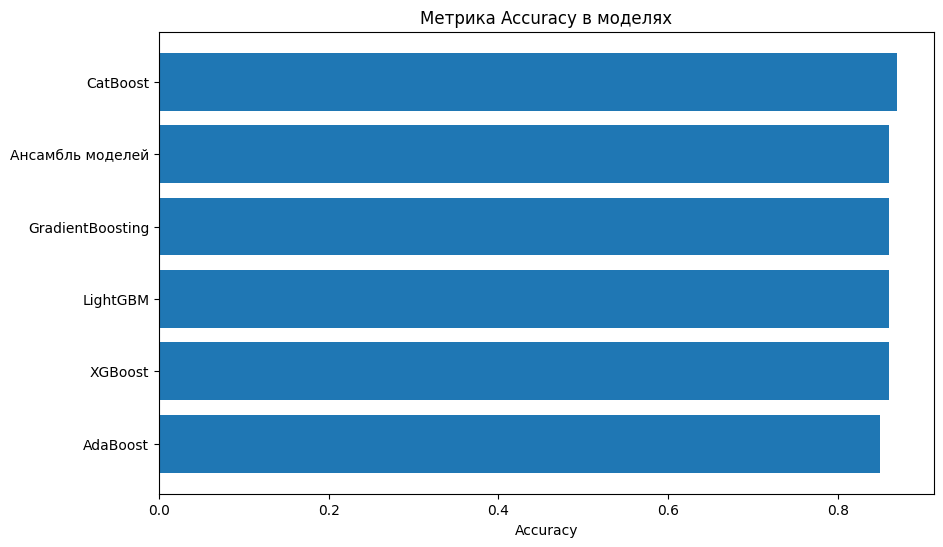

In [20]:
#Визуализация метрик качества моделей(Accuracy)
model_names = ['XGBoost', 'CatBoost', 'LightGBM', 'GradientBoosting', 'AdaBoost', 'Ансамбль моделей']
model_accuracy = np.asarray([0.86, 0.87, 0.86, 0.86, 0.85, 0.86])
sorted_idx = np.argsort(model_accuracy)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), model_accuracy[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [model_names[i] for i in sorted_idx])
plt.xlabel('Accuracy')
plt.title('Метрика Accuracy в моделях')
plt.show()

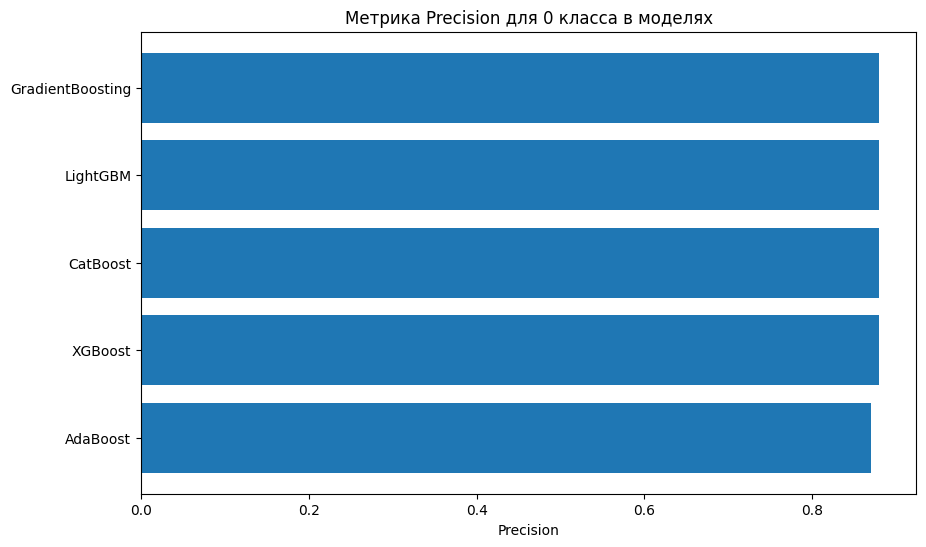

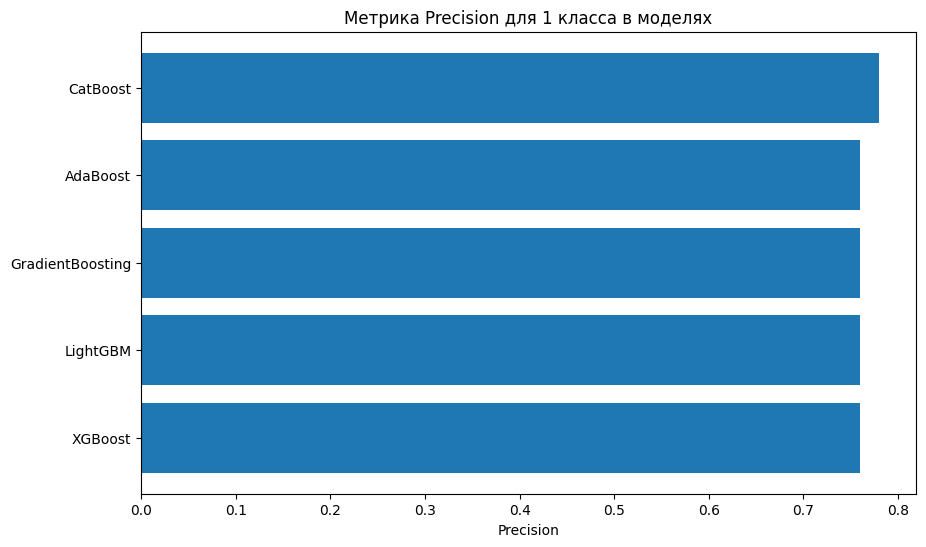

In [21]:
#Визуализация метрик качества моделей(precision)
model_names = ['XGBoost', 'CatBoost', 'LightGBM', 'GradientBoosting', 'AdaBoost']
model_precision_0 = np.asarray([0.88, 0.88, 0.88, 0.88, 0.87])
sorted_idx_0 = np.argsort(model_precision_0)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_0)), model_precision_0[sorted_idx_0], align='center')
plt.yticks(range(len(sorted_idx_0)), [model_names[i] for i in sorted_idx_0])
plt.xlabel('Precision')
plt.title('Метрика Precision для 0 класса в моделях')
plt.show()

model_precision_1 = np.asarray([0.76, 0.78, 0.76, 0.76, 0.76])
sorted_idx_1 = np.argsort(model_precision_1)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_1)), model_precision_1[sorted_idx_1], align='center')
plt.yticks(range(len(sorted_idx_1)), [model_names[i] for i in sorted_idx_1])
plt.xlabel('Precision')
plt.title('Метрика Precision для 1 класса в моделях')
plt.show()

C:\Users\User\PycharmProjects\DS\venv\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Number of positive: 17393, number of negative: 61654
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2301
[LightGBM] [Info] Number of data points in the train set: 79047, number of used features: 101
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.220034 -> initscore=-1.265470
[LightGBM] [Info] Start training from score -1.265470


C:\Users\User\PycharmProjects\DS\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


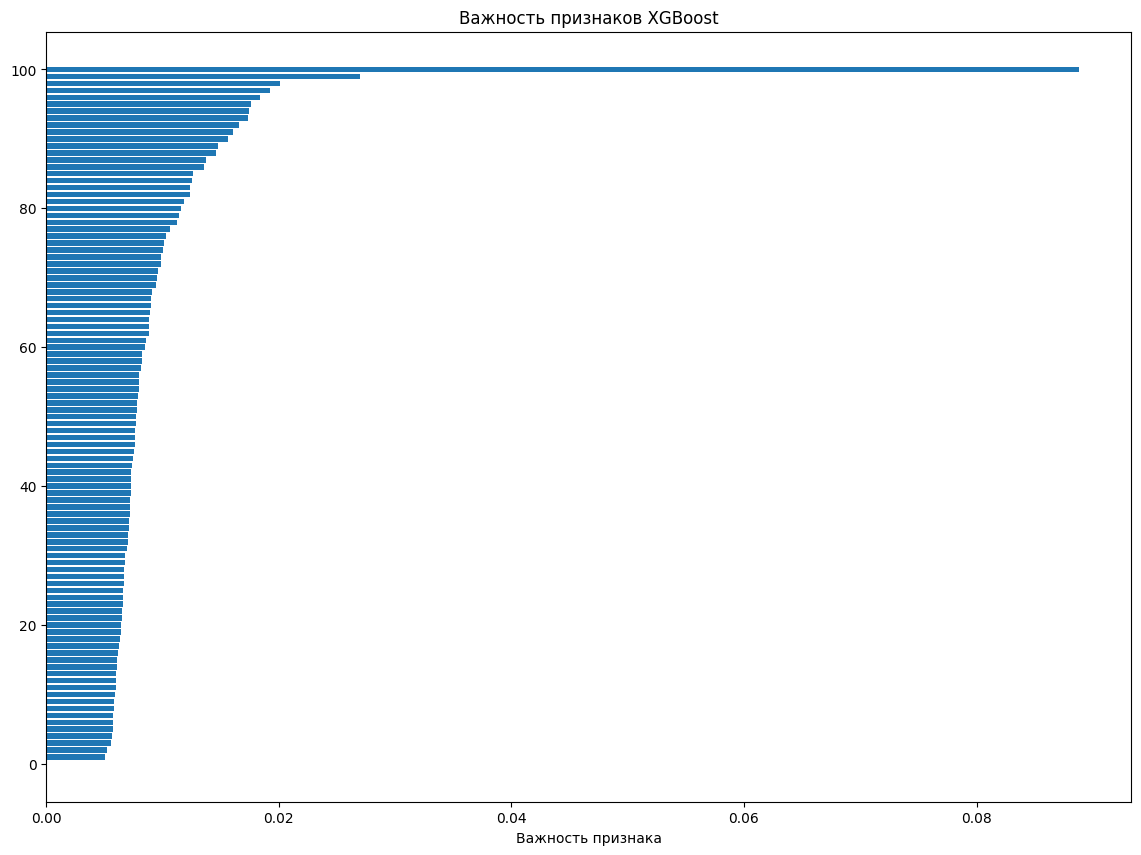

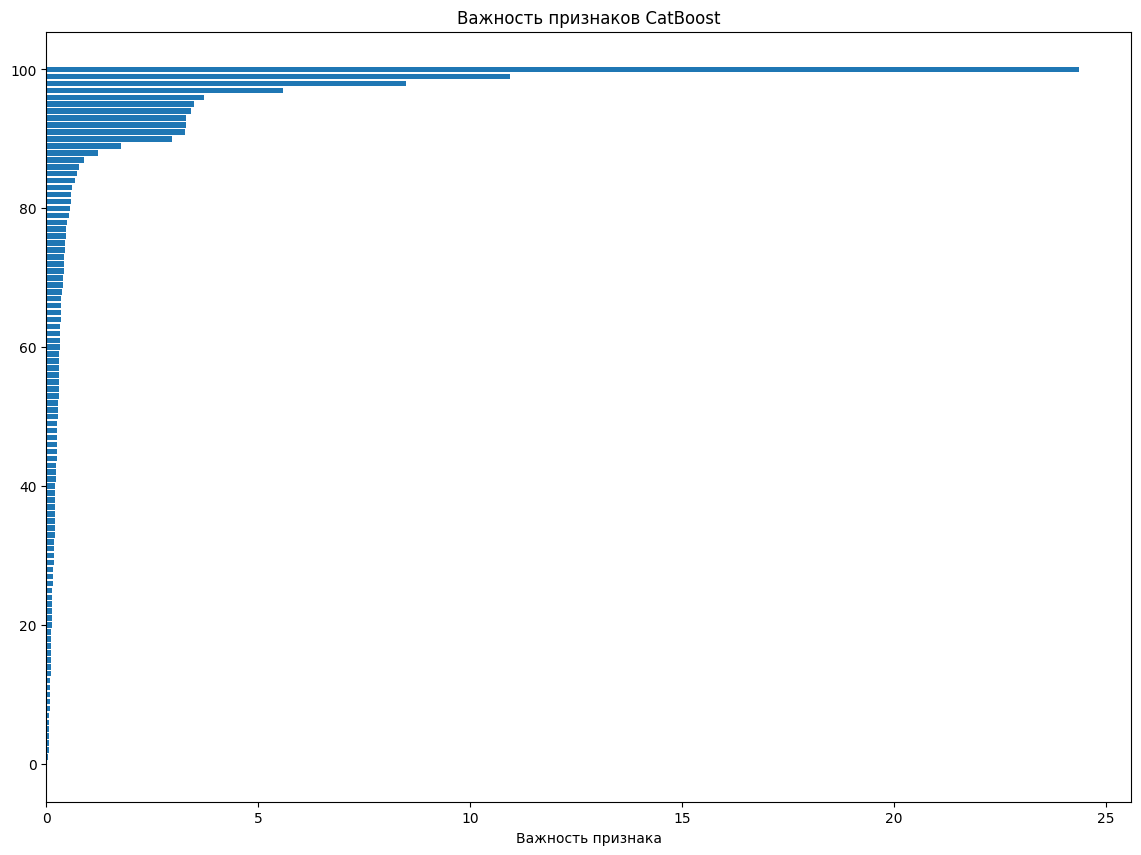

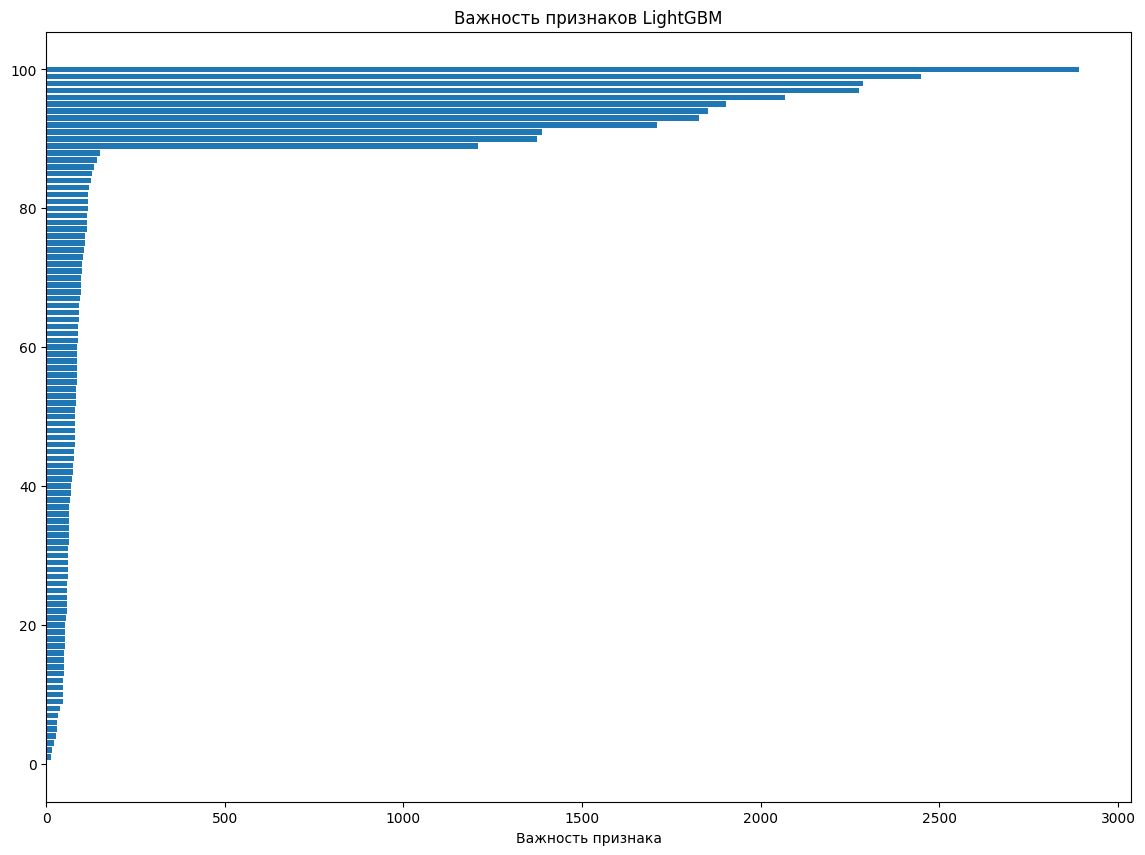

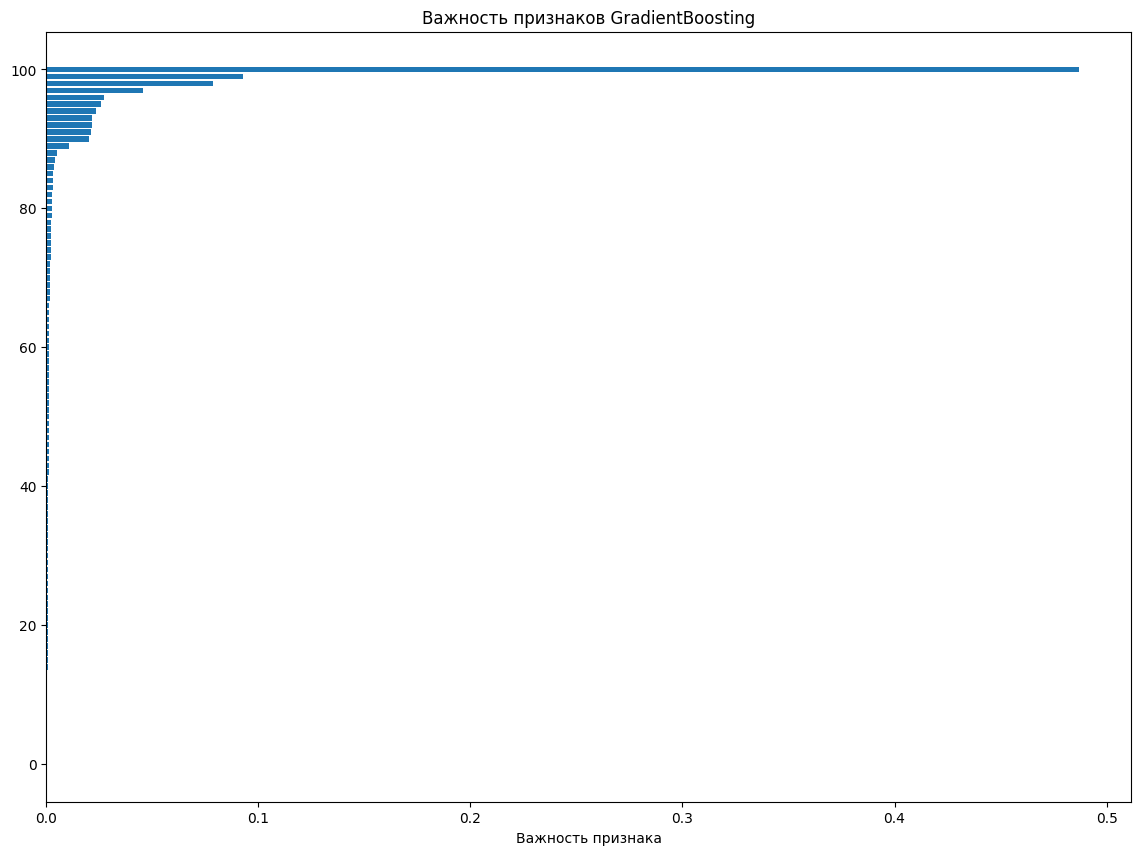

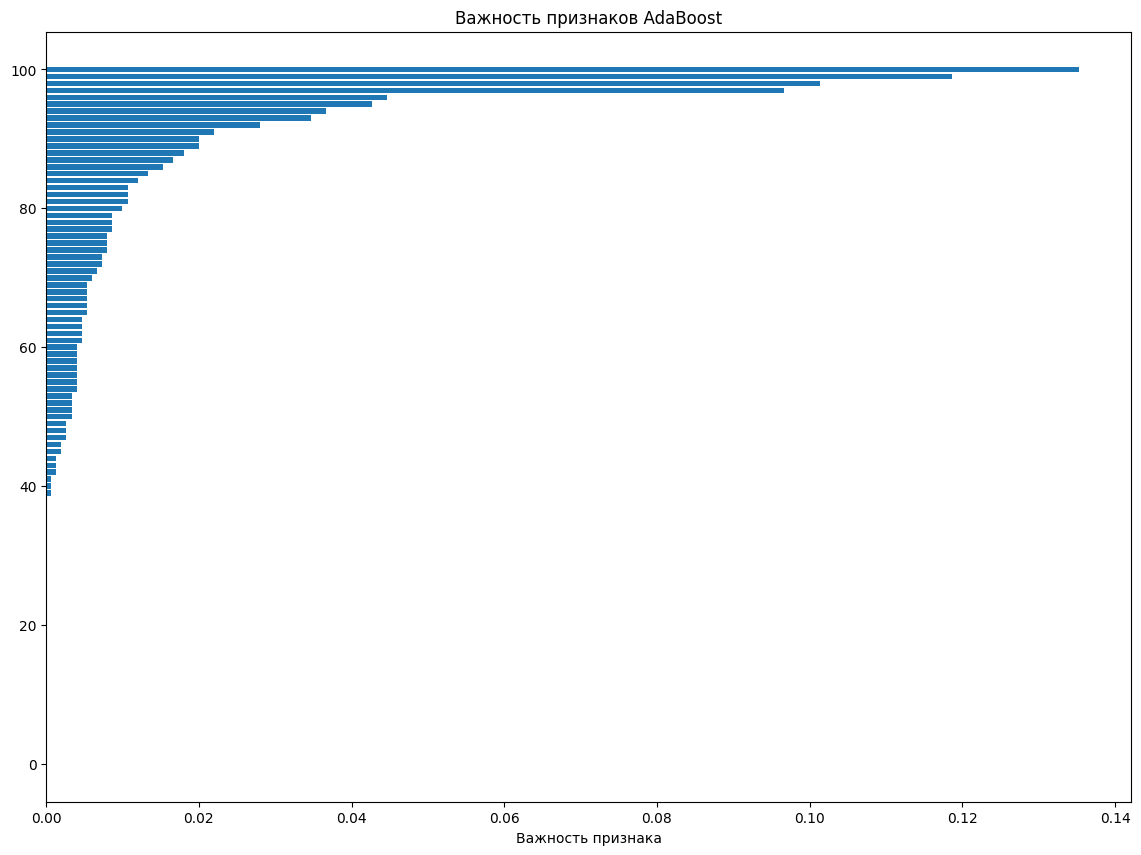

In [28]:
#Визуализация важности признаков

#Создание моделей
model_1 = XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=1000, random_state=42)
model_2 = CatBoostClassifier(depth=5, iterations=1000, learning_rate=0.1, random_state=42, verbose=0)
model_3 = LGBMClassifier(learning_rate=0.05, num_iterations=1000, num_leaves=31, random_state=42)
model_4 = GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=1500, random_state=42)
model_5 = AdaBoostClassifier(learning_rate=0.1, n_estimators=1500, random_state=42)

#Обучение моделей
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
model_4.fit(X_train, y_train)
model_5.fit(X_train, y_train)

models = {'XGBoost': model_1, 'CatBoost': model_2, 'LightGBM': model_3, 'GradientBoosting': model_4, 'AdaBoost': model_5}
columns = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday']

for name, model in models.items():
    feature_importances = model.feature_importances_
    feature_names = columns
    sorted_idx = np.argsort(feature_importances)
    
    plt.figure(figsize=(14, 10))
    plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
    try:
        plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    except:
        pass
    plt.xlabel('Важность признака')
    plt.title(f'Важность признаков {name}')
    plt.show()